In [1]:
import pandas as pd
import numpy as np

np.object = object  
np.int = int    
np.bool = bool 
np.float = float


import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
import gc

# 确认是否检测到 GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# 列出所有可用设备
for device in tf.config.list_physical_devices():
    print(device)

# 显示 TensorFlow 使用的设备
#tf.debugging.set_log_device_placement(True)

# 创建一个简单的操作以确认设备类型
a = tf.constant([[1.0, 2.0, 3.0]])
b = tf.constant([[4.0, 5.0, 6.0]])
c = tf.matmul(a, b, transpose_b=True)
print(c)

c:\Users\asdf6\anaconda3\envs\ggpu\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Num GPUs Available:  1
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
tf.Tensor([[32.]], shape=(1, 1), dtype=float32)


C:\Users\ncuesa\AppData\Local\Temp\3\ipykernel_42084\1551744058.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['時間'] = pd.to_datetime(data_cleaned['時間'])
c:\Users\ncuesa\.conda\envs\TF\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ncuesa\.conda\envs\TF\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ncuesa\.conda\envs\TF\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36895 (\N{CJK UNIFIED IDEOGRAPH-901F}) missing from current font.
  

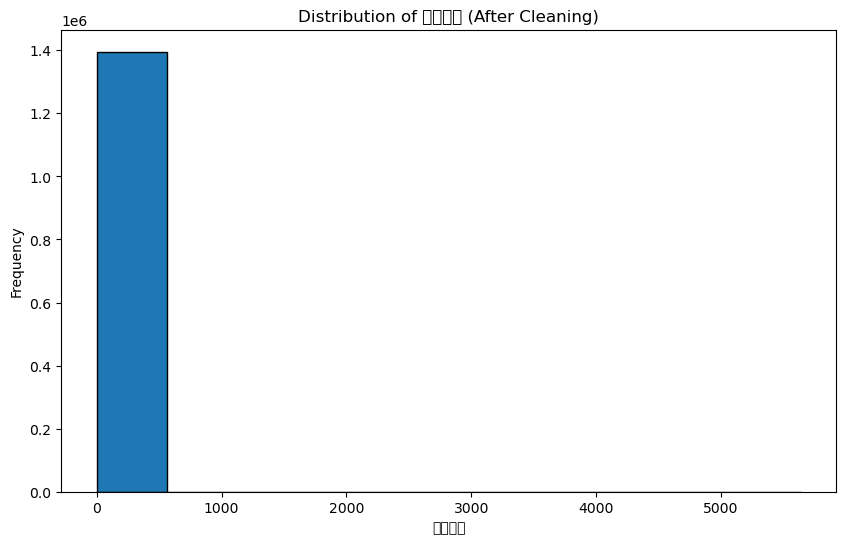

Group: 03F0158S -> 05F0000S
                    時間      起點路段      終點路段       平均速度  車流數量
2  2023-01-01 00:00:00  03F0158S  05F0000S  35.555556    18
18 2023-01-01 00:05:00  03F0158S  05F0000S  35.800000    20
34 2023-01-01 00:10:00  03F0158S  05F0000S  35.891892    37
50 2023-01-01 00:15:00  03F0158S  05F0000S  36.000000    35
66 2023-01-01 00:20:00  03F0158S  05F0000S  32.551724    58


Group: 03F0201N -> 05F0000S
                    時間      起點路段      終點路段       平均速度  車流數量
3  2023-01-01 00:00:00  03F0201N  05F0000S  71.000000    19
19 2023-01-01 00:05:00  03F0201N  05F0000S  68.210526    19
35 2023-01-01 00:10:00  03F0201N  05F0000S  68.000000    26
51 2023-01-01 00:15:00  03F0201N  05F0000S  68.935484    31
67 2023-01-01 00:20:00  03F0201N  05F0000S  71.809524    21


Group: 05F0000S -> 05F0055S
                    時間      起點路段      終點路段       平均速度  車流數量
6  2023-01-01 00:00:00  05F0000S  05F0055S  81.230769    39
22 2023-01-01 00:05:00  05F0000S  05F0055S  81.100000    40
38 2023-01-0

c:\Users\ncuesa\.conda\envs\TF\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ncuesa\.conda\envs\TF\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ncuesa\.conda\envs\TF\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36895 (\N{CJK UNIFIED IDEOGRAPH-901F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ncuesa\.conda\envs\TF\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


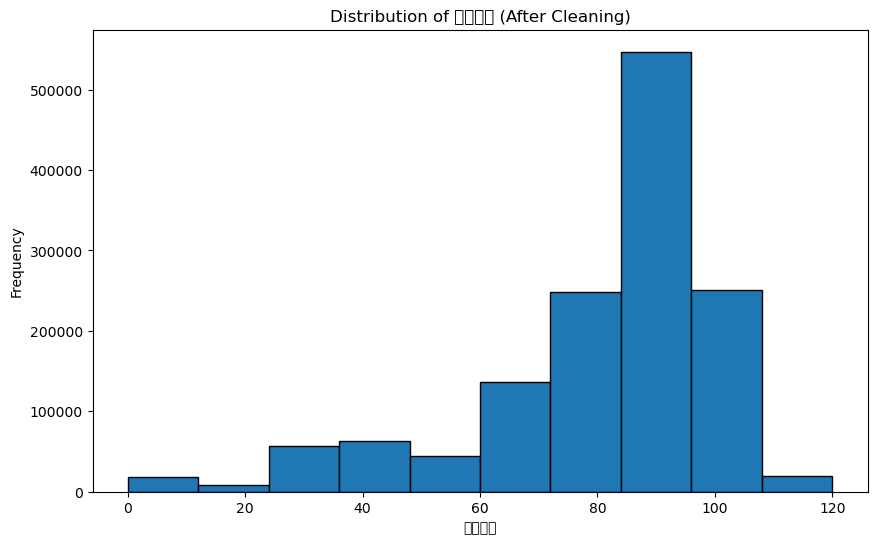

In [2]:
agg_file = r'./FilteredData/aggregated_data.csv'
aggregated_data = pd.read_csv(agg_file)
data_cleaned = aggregated_data.dropna(subset=['平均速度'])
data_cleaned['時間'] = pd.to_datetime(data_cleaned['時間'])

plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['平均速度'], bins=10, edgecolor='k')
plt.title('Distribution of 平均速度 (After Cleaning)')
plt.xlabel('平均速度')
plt.ylabel('Frequency')
plt.show()

speed_threshold = 120
data_cleaned = data_cleaned[data_cleaned['平均速度'] <= speed_threshold]
grouped = data_cleaned.groupby(['起點路段', '終點路段'])
for (start_point, end_point), group in grouped:
    print(f"Group: {start_point} -> {end_point}")
    print(group.head())  # 打印前几行数据
    print("\n")

plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['平均速度'], bins=10, edgecolor='k')
plt.title('Distribution of 平均速度 (After Cleaning)')
plt.xlabel('平均速度')
plt.ylabel('Frequency')
plt.show()

In [3]:
def create_features(df):
    df['hour'] = df['時間'].dt.hour
    df['dayofweek'] = df['時間'].dt.dayofweek
    df['month'] = df['時間'].dt.month
    df['lag1'] = df['平均速度'].shift(1)
    df['lag2'] = df['平均速度'].shift(2)
    df['moving_avg_3'] = df['平均速度'].rolling(window=3).mean()
    df['high_load'] = ((df['dayofweek'] == 6) & (df['hour'] >= 15) & (df['hour'] <= 20)).astype(int)  # 高乘載因子
    df = df.dropna()  # 去除NaN值
    return df

Training model for route: 03F0158S -> 05F0000S
Epoch 1/20
2457/2457 [==============================] - 10s 3ms/step - loss: 114.7997 - val_loss: 4.2857
Epoch 2/20
2457/2457 [==============================] - 6s 2ms/step - loss: 9.0907 - val_loss: 2.3961
Epoch 3/20
2457/2457 [==============================] - 5s 2ms/step - loss: 7.4958 - val_loss: 1.2834
Epoch 4/20
2457/2457 [==============================] - 6s 2ms/step - loss: 6.6815 - val_loss: 0.9348
Epoch 5/20
2457/2457 [==============================] - 8s 3ms/step - loss: 6.2405 - val_loss: 0.5043
Epoch 6/20
2457/2457 [==============================] - 6s 2ms/step - loss: 5.9045 - val_loss: 0.4790
Epoch 7/20
2457/2457 [==============================] - 6s 2ms/step - loss: 5.6180 - val_loss: 0.3449
Epoch 8/20
2457/2457 [==============================] - 6s 2ms/step - loss: 5.3477 - val_loss: 0.2644
Epoch 9/20
2457/2457 [==============================] - 6s 2ms/step - loss: 5.0648 - val_loss: 0.5024
Epoch 10/20
2457/2457 [=========

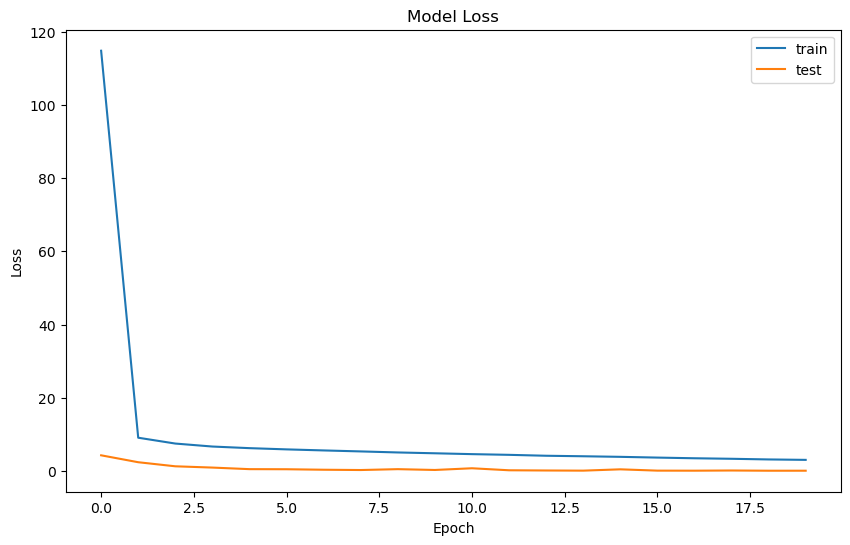

279/279 [==============================] - 0s 815us/step
MSE for route 03F0158S -> 05F0000S: 0.07740003285472064
MAE for route 03F0158S -> 05F0000S: 0.19767964673363111
R2 Score for route 03F0158S -> 05F0000S: 0.9983423515547506
MAPE for route 03F0158S -> 05F0000S: 0.88446058191935%
Accuracy within 10% tolerance for route 03F0158S -> 05F0000S: 99.74235465441917%


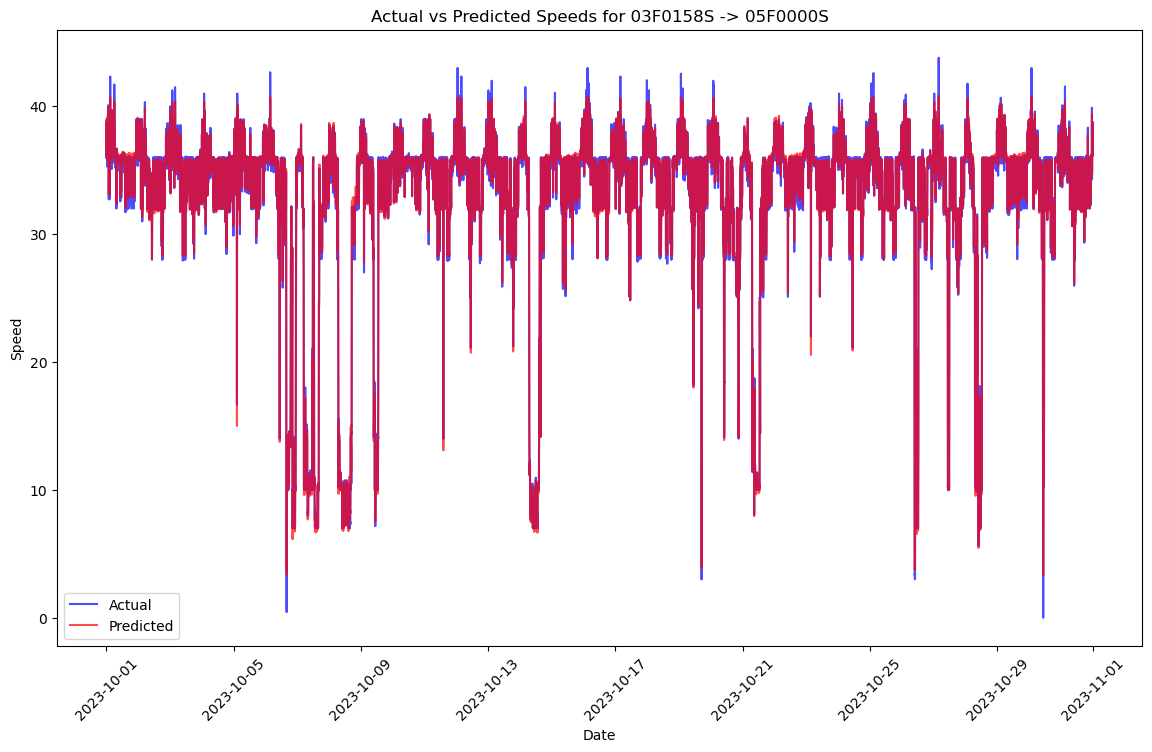

Training model for route: 03F0201N -> 05F0000S
Epoch 1/20
2456/2456 [==============================] - 10s 3ms/step - loss: 886.2154 - val_loss: 185.5177
Epoch 2/20
2456/2456 [==============================] - 6s 2ms/step - loss: 91.3714 - val_loss: 12.4465
Epoch 3/20
2456/2456 [==============================] - 6s 2ms/step - loss: 31.7598 - val_loss: 7.9699
Epoch 4/20
2456/2456 [==============================] - 6s 2ms/step - loss: 28.5384 - val_loss: 4.7199
Epoch 5/20
2456/2456 [==============================] - 6s 2ms/step - loss: 25.1930 - val_loss: 3.7645
Epoch 6/20
2456/2456 [==============================] - 6s 2ms/step - loss: 23.5283 - val_loss: 1.3401
Epoch 7/20
2456/2456 [==============================] - 7s 3ms/step - loss: 22.3494 - val_loss: 1.0521
Epoch 8/20
2456/2456 [==============================] - 8s 3ms/step - loss: 21.9622 - val_loss: 1.0799
Epoch 9/20
2456/2456 [==============================] - 8s 3ms/step - loss: 21.3241 - val_loss: 1.1780
Epoch 10/20
2456/2456

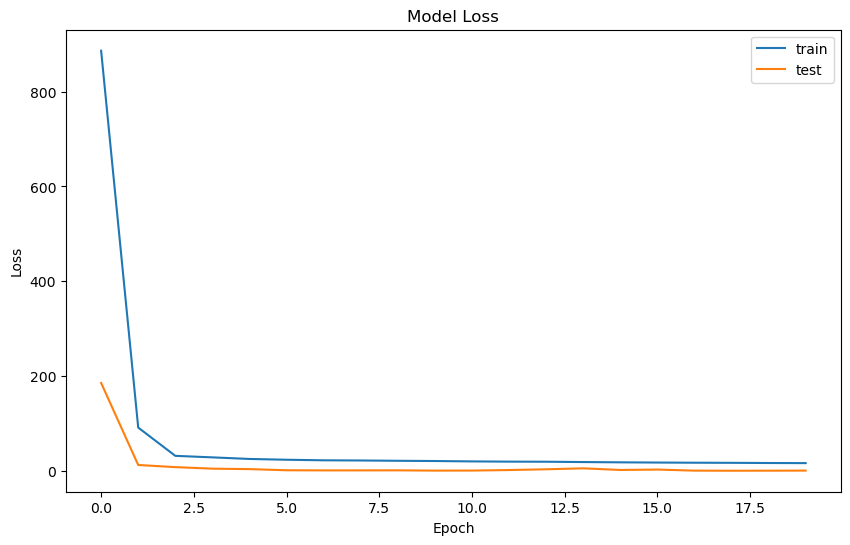

279/279 [==============================] - 0s 811us/step
MSE for route 03F0201N -> 05F0000S: 0.638273326052073
MAE for route 03F0201N -> 05F0000S: 0.6100590772926847
R2 Score for route 03F0201N -> 05F0000S: 0.9964485413187879
MAPE for route 03F0201N -> 05F0000S: 1.1468789364551533%
Accuracy within 10% tolerance for route 03F0201N -> 05F0000S: 99.11464754006501%


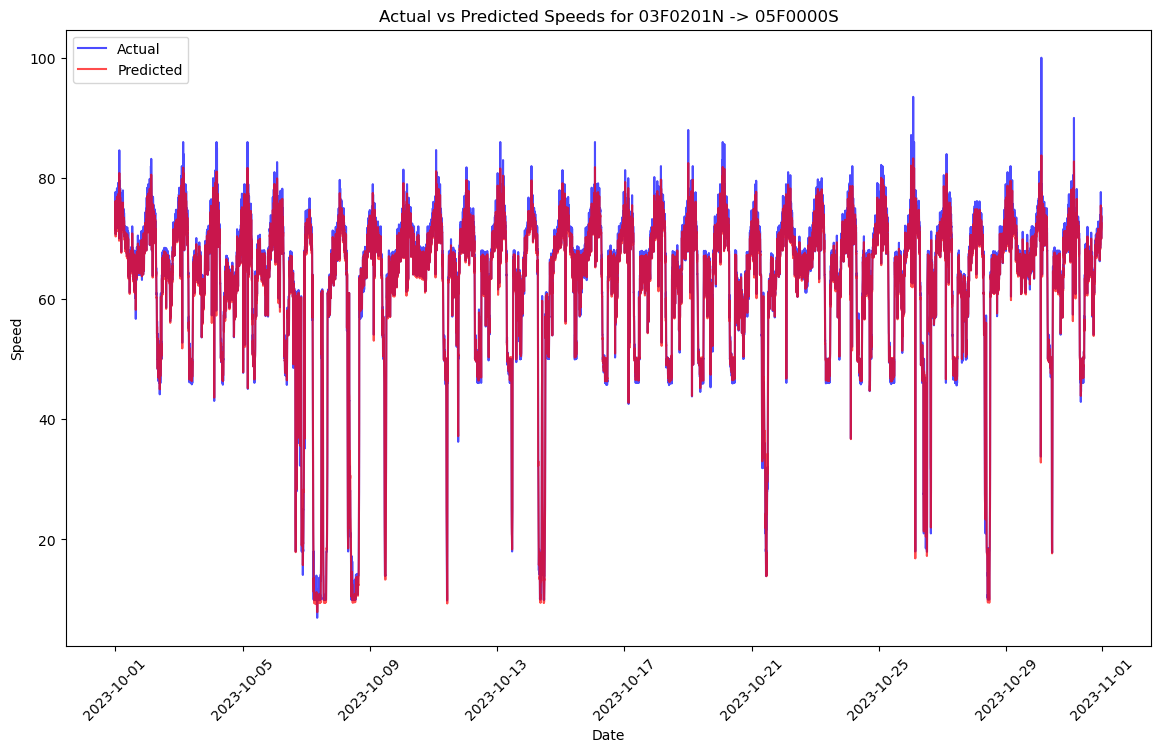

Training model for route: 05F0000S -> 05F0055S
Epoch 1/20
2455/2455 [==============================] - 11s 3ms/step - loss: 1339.5972 - val_loss: 127.1809
Epoch 2/20
2455/2455 [==============================] - 6s 2ms/step - loss: 218.3773 - val_loss: 85.8011
Epoch 3/20
2455/2455 [==============================] - 6s 2ms/step - loss: 74.5609 - val_loss: 8.6290
Epoch 4/20
2455/2455 [==============================] - 6s 2ms/step - loss: 36.7236 - val_loss: 7.6388
Epoch 5/20
2455/2455 [==============================] - 6s 2ms/step - loss: 34.5923 - val_loss: 6.3729
Epoch 6/20
2455/2455 [==============================] - 6s 2ms/step - loss: 33.3100 - val_loss: 5.9388
Epoch 7/20
2455/2455 [==============================] - 6s 2ms/step - loss: 31.7501 - val_loss: 4.5152
Epoch 8/20
2455/2455 [==============================] - 6s 2ms/step - loss: 30.3405 - val_loss: 2.9439
Epoch 9/20
2455/2455 [==============================] - 6s 2ms/step - loss: 29.5139 - val_loss: 1.9200
Epoch 10/20
2455/24

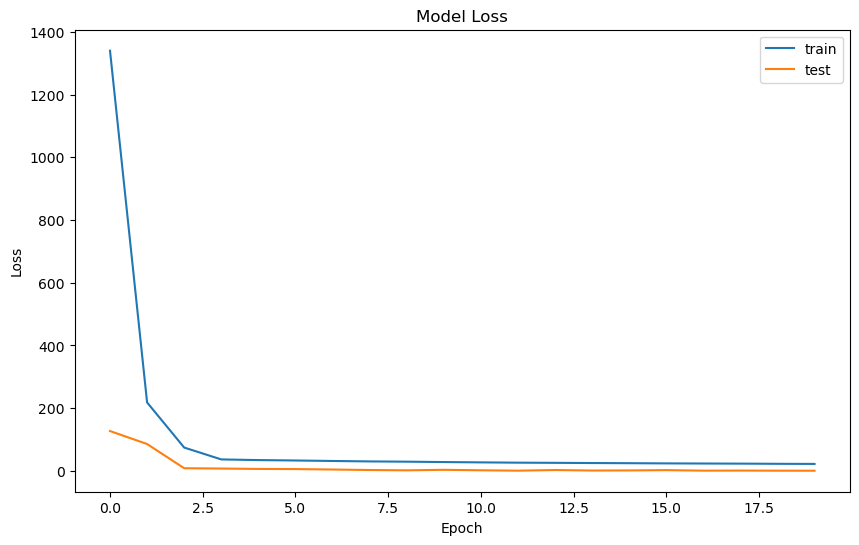

279/279 [==============================] - 0s 1ms/step
MSE for route 05F0000S -> 05F0055S: 0.6809159687287049
MAE for route 05F0000S -> 05F0055S: 0.6176297580325536
R2 Score for route 05F0000S -> 05F0055S: 0.9916217651759222
MAPE for route 05F0000S -> 05F0055S: 0.8410876195184975%
Accuracy within 10% tolerance for route 05F0000S -> 05F0055S: 99.86559139784946%


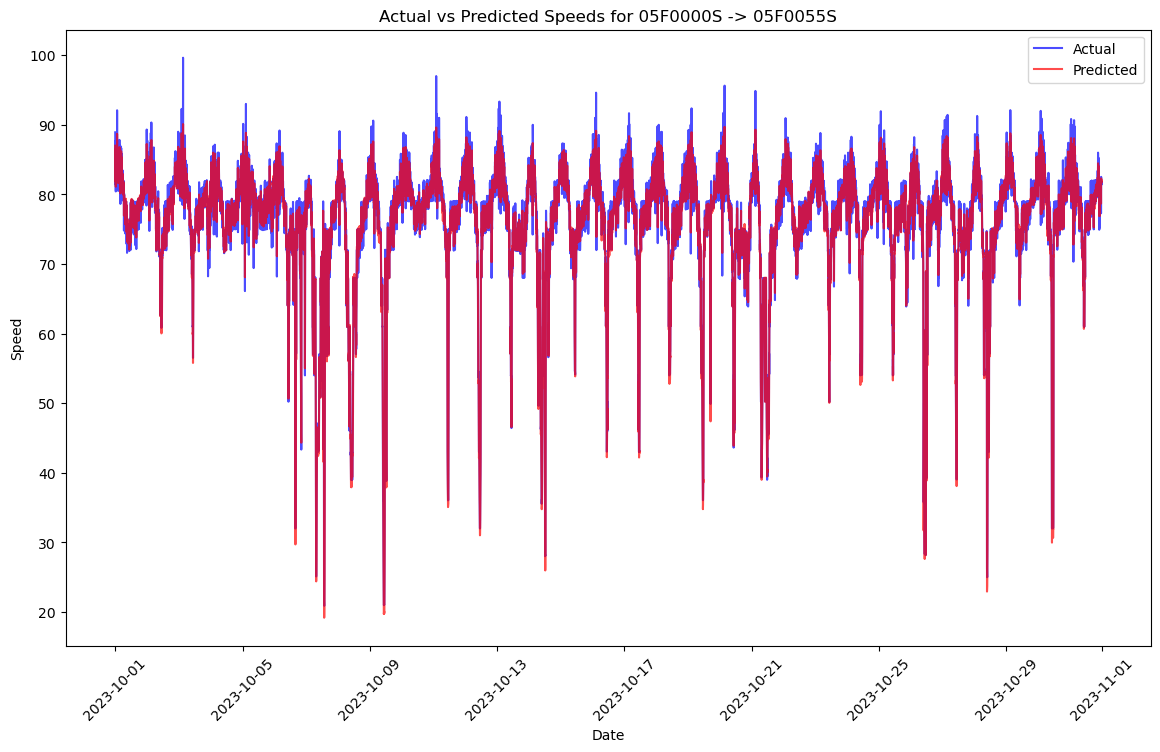

Training model for route: 05F0001N -> 03F0150N
Epoch 1/20
2455/2455 [==============================] - 17s 4ms/step - loss: 2807.8191 - val_loss: 290.8427
Epoch 2/20
2455/2455 [==============================] - 8s 3ms/step - loss: 134.8026 - val_loss: 82.6111
Epoch 3/20
2455/2455 [==============================] - 8s 3ms/step - loss: 92.2655 - val_loss: 83.0033
Epoch 4/20
2455/2455 [==============================] - 8s 3ms/step - loss: 89.8302 - val_loss: 39.3155
Epoch 5/20
2455/2455 [==============================] - 8s 3ms/step - loss: 62.2878 - val_loss: 28.5563
Epoch 6/20
2455/2455 [==============================] - 8s 3ms/step - loss: 58.6844 - val_loss: 23.3301
Epoch 7/20
2455/2455 [==============================] - 8s 3ms/step - loss: 55.4938 - val_loss: 15.9311
Epoch 8/20
2455/2455 [==============================] - 8s 3ms/step - loss: 52.5313 - val_loss: 11.9576
Epoch 9/20
2455/2455 [==============================] - 8s 3ms/step - loss: 49.1553 - val_loss: 12.8605
Epoch 10/20


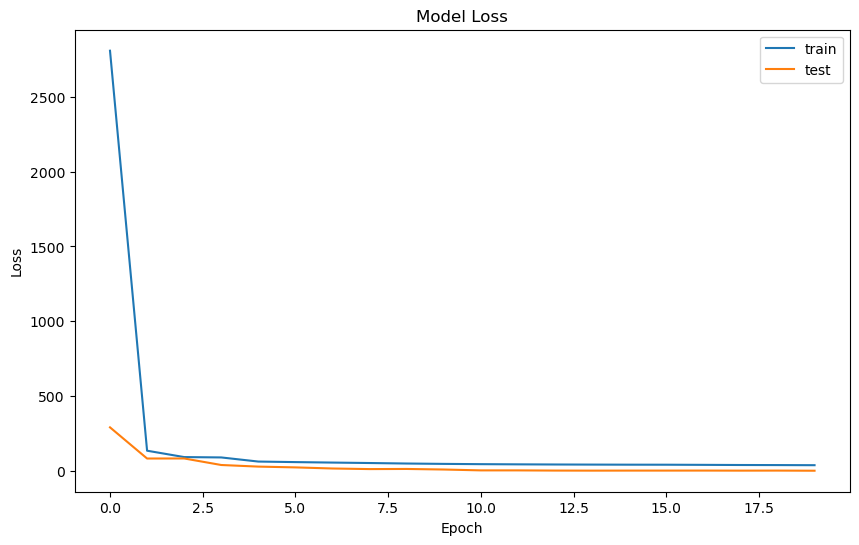

279/279 [==============================] - 0s 1ms/step
MSE for route 05F0001N -> 03F0150N: 1.0662251972744339
MAE for route 05F0001N -> 03F0150N: 0.4952134934998782
R2 Score for route 05F0001N -> 03F0150N: 0.9866695063548883
MAPE for route 05F0001N -> 03F0150N: 0.8197341425701283%
Accuracy within 10% tolerance for route 05F0001N -> 03F0150N: 99.51793721973094%


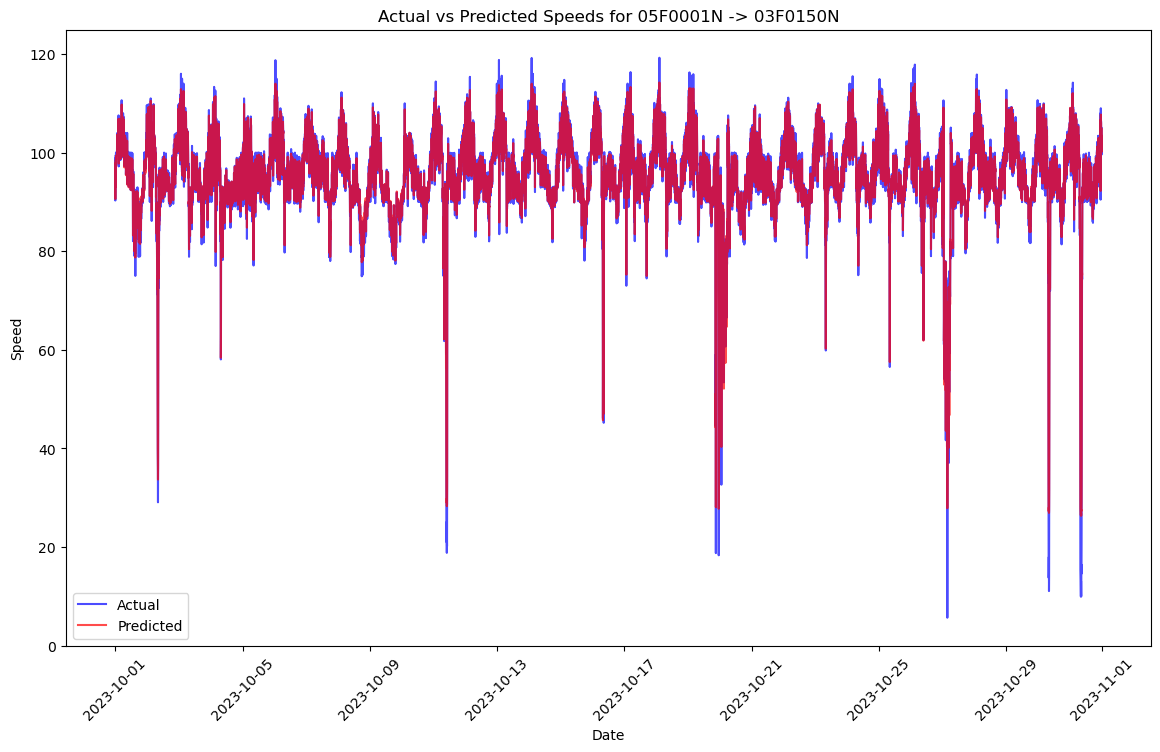

Training model for route: 05F0001N -> 03F0201S
Epoch 1/20
2456/2456 [==============================] - 17s 4ms/step - loss: 670.9714 - val_loss: 93.0679
Epoch 2/20
2456/2456 [==============================] - 8s 3ms/step - loss: 94.0759 - val_loss: 93.4320
Epoch 3/20
2456/2456 [==============================] - 8s 3ms/step - loss: 53.9589 - val_loss: 8.4723
Epoch 4/20
2456/2456 [==============================] - 8s 3ms/step - loss: 26.5716 - val_loss: 6.2373
Epoch 5/20
2456/2456 [==============================] - 7s 3ms/step - loss: 23.9626 - val_loss: 3.4208
Epoch 6/20
2456/2456 [==============================] - 6s 2ms/step - loss: 21.9560 - val_loss: 3.1645
Epoch 7/20
2456/2456 [==============================] - 9s 3ms/step - loss: 20.4504 - val_loss: 5.8589
Epoch 8/20
2456/2456 [==============================] - 6s 2ms/step - loss: 19.2738 - val_loss: 1.0145
Epoch 9/20
2456/2456 [==============================] - 6s 2ms/step - loss: 18.6796 - val_loss: 1.7106
Epoch 10/20
2456/2456 

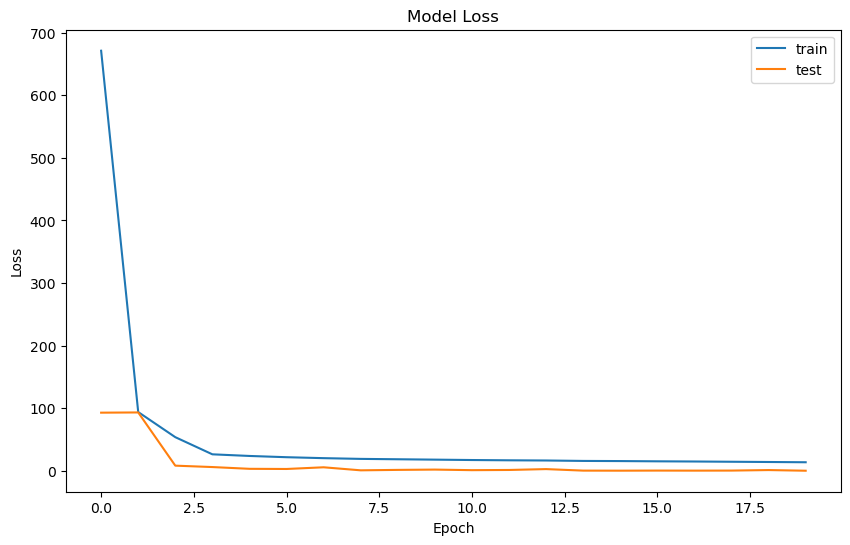

279/279 [==============================] - 0s 801us/step
MSE for route 05F0001N -> 03F0201S: 0.3820012918147368
MAE for route 05F0001N -> 03F0201S: 0.47134061803540694
R2 Score for route 05F0001N -> 03F0201S: 0.995889034430812
MAPE for route 05F0001N -> 03F0201S: 0.9519915321689949%
Accuracy within 10% tolerance for route 05F0001N -> 03F0201S: 99.68623935454953%


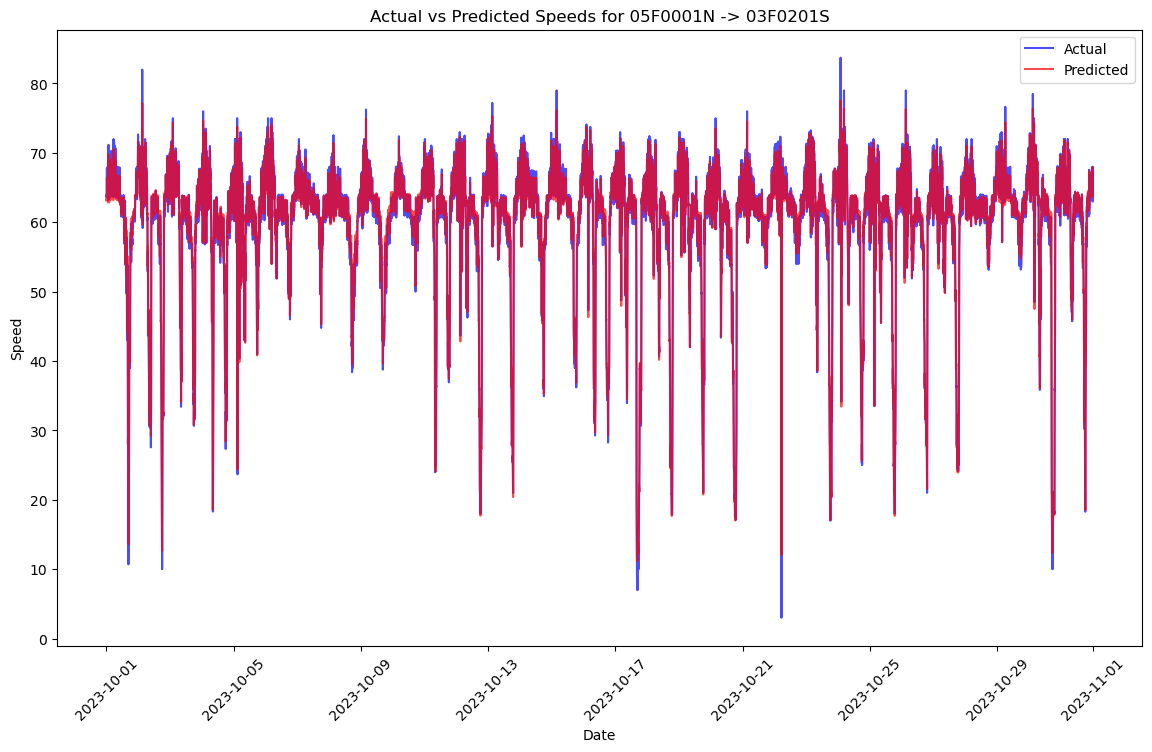

Training model for route: 05F0055N -> 05F0001N
Epoch 1/20
2456/2456 [==============================] - 12s 3ms/step - loss: 1562.5352 - val_loss: 138.1091
Epoch 2/20
2456/2456 [==============================] - 7s 3ms/step - loss: 145.1342 - val_loss: 96.3090
Epoch 3/20
2456/2456 [==============================] - 7s 3ms/step - loss: 140.0530 - val_loss: 69.0079
Epoch 4/20
2456/2456 [==============================] - 7s 3ms/step - loss: 47.9254 - val_loss: 8.9870
Epoch 5/20
2456/2456 [==============================] - 7s 3ms/step - loss: 41.4365 - val_loss: 7.9350
Epoch 6/20
2456/2456 [==============================] - 7s 3ms/step - loss: 39.5178 - val_loss: 6.1747
Epoch 7/20
2456/2456 [==============================] - 7s 3ms/step - loss: 37.4772 - val_loss: 4.7167
Epoch 8/20
2456/2456 [==============================] - 7s 3ms/step - loss: 35.1305 - val_loss: 2.6808
Epoch 9/20
2456/2456 [==============================] - 8s 3ms/step - loss: 33.5510 - val_loss: 2.8493
Epoch 10/20
2456/

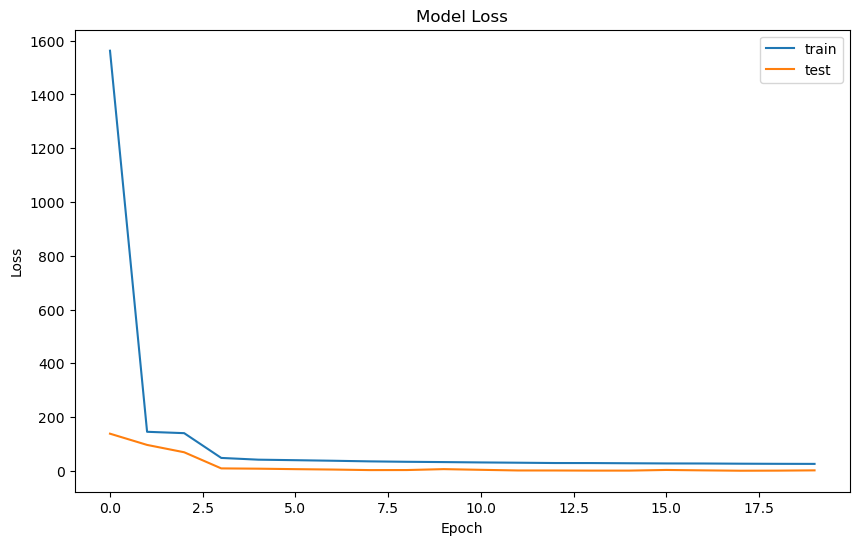

279/279 [==============================] - 0s 911us/step
MSE for route 05F0055N -> 05F0001N: 1.686315291959522
MAE for route 05F0055N -> 05F0001N: 1.1626660002980564
R2 Score for route 05F0055N -> 05F0001N: 0.9824806987818937
MAPE for route 05F0055N -> 05F0001N: 1.526221562210376%
Accuracy within 10% tolerance for route 05F0055N -> 05F0001N: 99.48470930883836%


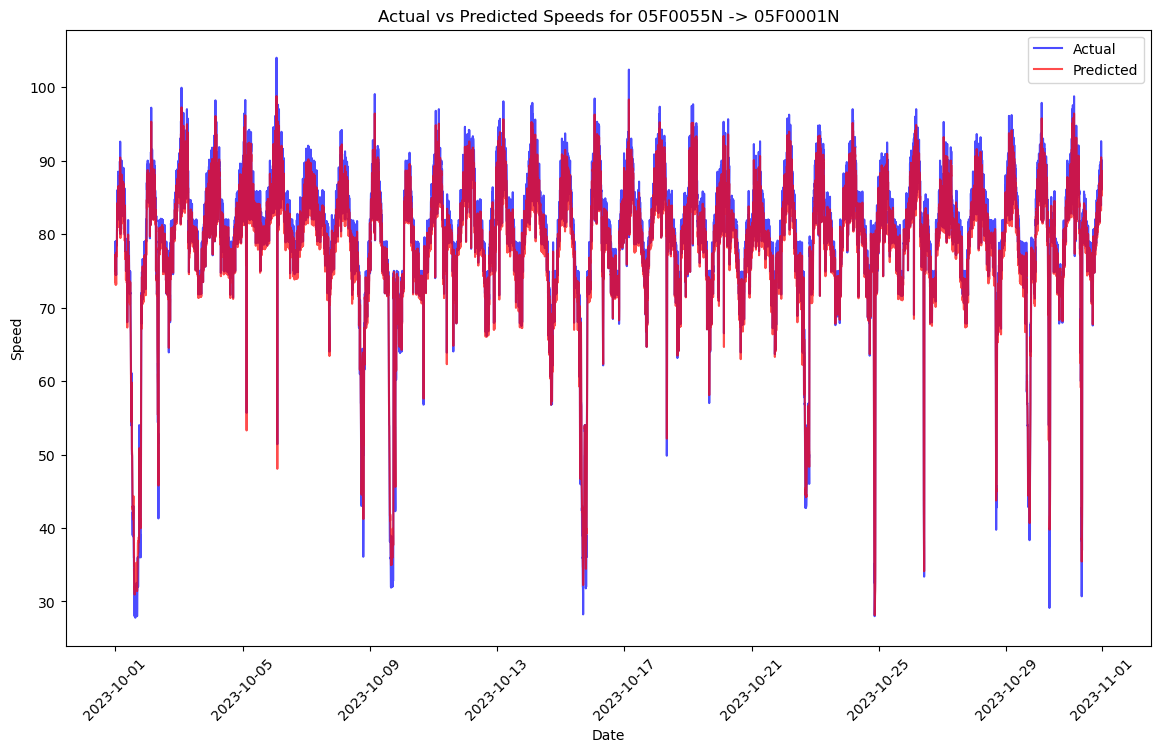

Training model for route: 05F0055S -> 05F0287S
Epoch 1/20
2455/2455 [==============================] - 11s 3ms/step - loss: 1475.1646 - val_loss: 154.8335
Epoch 2/20
2455/2455 [==============================] - 6s 2ms/step - loss: 203.8097 - val_loss: 97.3555
Epoch 3/20
2455/2455 [==============================] - 6s 2ms/step - loss: 50.6380 - val_loss: 5.1657
Epoch 4/20
2455/2455 [==============================] - 6s 2ms/step - loss: 35.6117 - val_loss: 4.0784
Epoch 5/20
2455/2455 [==============================] - 6s 3ms/step - loss: 34.1637 - val_loss: 3.6772
Epoch 6/20
2455/2455 [==============================] - 6s 3ms/step - loss: 33.0935 - val_loss: 3.7205
Epoch 7/20
2455/2455 [==============================] - 6s 3ms/step - loss: 32.2502 - val_loss: 3.2036
Epoch 8/20
2455/2455 [==============================] - 6s 3ms/step - loss: 31.4528 - val_loss: 3.0088
Epoch 9/20
2455/2455 [==============================] - 6s 2ms/step - loss: 30.7995 - val_loss: 2.9628
Epoch 10/20
2455/24

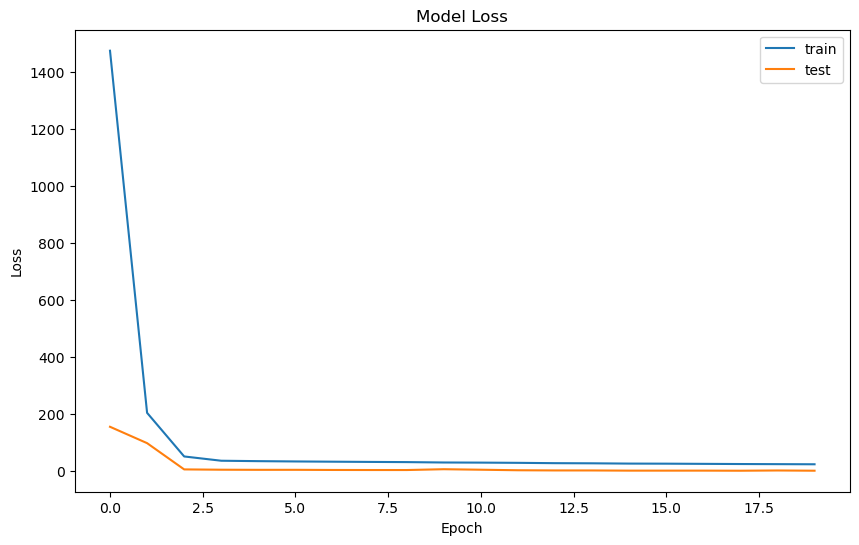

279/279 [==============================] - 0s 936us/step
MSE for route 05F0055S -> 05F0287S: 0.5909083945334705
MAE for route 05F0055S -> 05F0287S: 0.5872448921998151
R2 Score for route 05F0055S -> 05F0287S: 0.9936191834408342
MAPE for route 05F0055S -> 05F0287S: 0.7885162307308929%
Accuracy within 10% tolerance for route 05F0055S -> 05F0287S: 99.87675070028011%


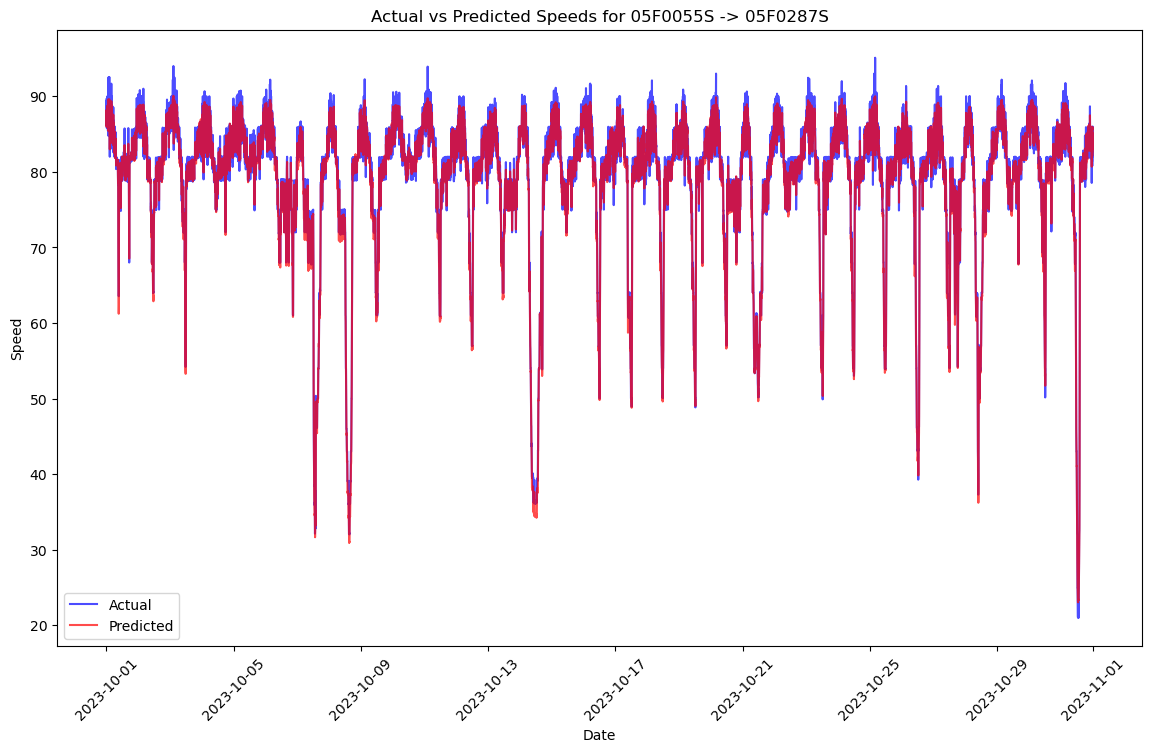

Training model for route: 05F0287N -> 05F0055N
Epoch 1/20
2454/2454 [==============================] - 12s 3ms/step - loss: 1301.0647 - val_loss: 212.5951
Epoch 2/20
2454/2454 [==============================] - 7s 3ms/step - loss: 221.8186 - val_loss: 188.7340
Epoch 3/20
2454/2454 [==============================] - 7s 3ms/step - loss: 95.9247 - val_loss: 6.9052
Epoch 4/20
2454/2454 [==============================] - 7s 3ms/step - loss: 34.8342 - val_loss: 4.8071
Epoch 5/20
2454/2454 [==============================] - 7s 3ms/step - loss: 32.7354 - val_loss: 6.5515
Epoch 6/20
2454/2454 [==============================] - 7s 3ms/step - loss: 31.2943 - val_loss: 4.6909
Epoch 7/20
2454/2454 [==============================] - 7s 3ms/step - loss: 30.3178 - val_loss: 3.2978
Epoch 8/20
2454/2454 [==============================] - 7s 3ms/step - loss: 29.5692 - val_loss: 3.6658
Epoch 9/20
2454/2454 [==============================] - 7s 3ms/step - loss: 28.5178 - val_loss: 2.2449
Epoch 10/20
2454/2

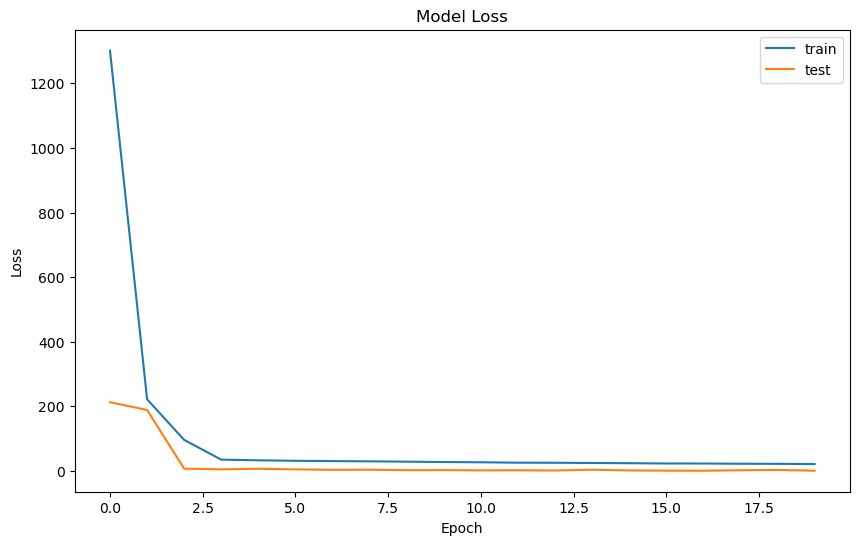

279/279 [==============================] - 0s 947us/step
MSE for route 05F0287N -> 05F0055N: 0.5820641827592664
MAE for route 05F0287N -> 05F0055N: 0.5744452859477235
R2 Score for route 05F0287N -> 05F0055N: 0.996899731076027
MAPE for route 05F0287N -> 05F0055N: 0.8933167961601957%
Accuracy within 10% tolerance for route 05F0287N -> 05F0055N: 99.75358422939068%


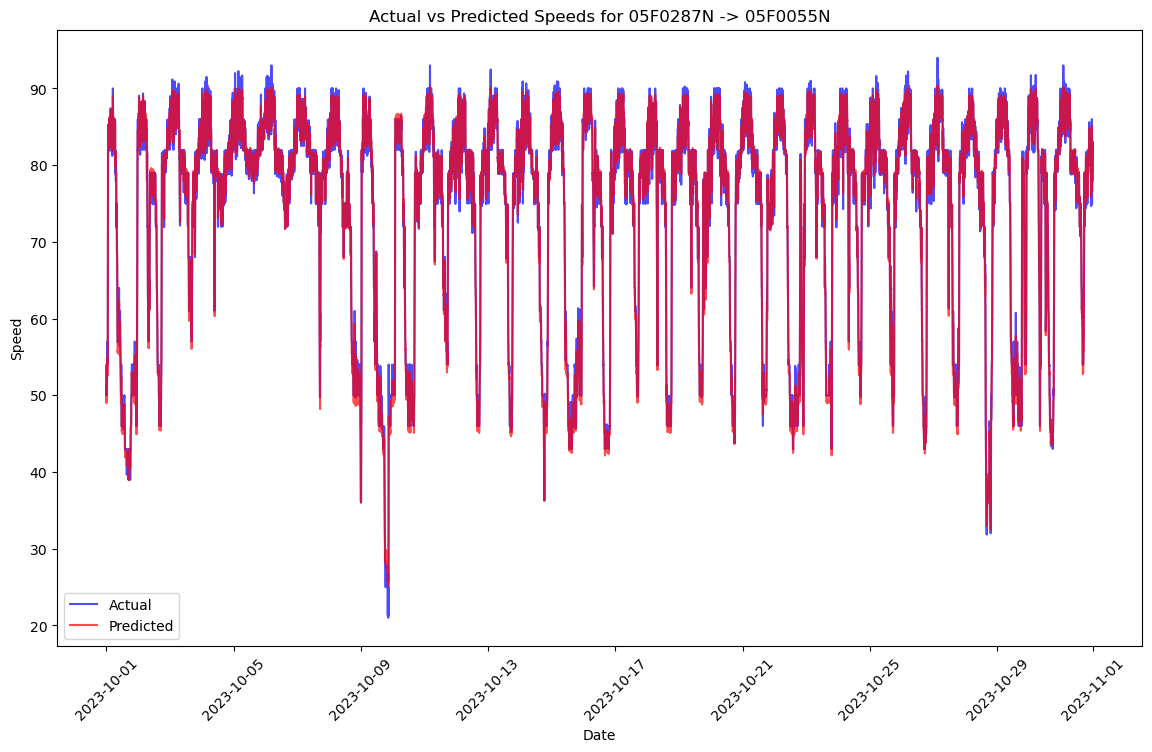

Training model for route: 05F0287S -> 05F0309S
Epoch 1/20
2456/2456 [==============================] - 12s 3ms/step - loss: 2036.8312 - val_loss: 126.0264
Epoch 2/20
2456/2456 [==============================] - 6s 3ms/step - loss: 74.1619 - val_loss: 13.6964
Epoch 3/20
2456/2456 [==============================] - 7s 3ms/step - loss: 58.9038 - val_loss: 13.6983
Epoch 4/20
2456/2456 [==============================] - 6s 3ms/step - loss: 56.6957 - val_loss: 9.0809
Epoch 5/20
2456/2456 [==============================] - 6s 3ms/step - loss: 47.2205 - val_loss: 7.7572
Epoch 6/20
2456/2456 [==============================] - 6s 3ms/step - loss: 45.6891 - val_loss: 7.7283
Epoch 7/20
2456/2456 [==============================] - 6s 3ms/step - loss: 45.1169 - val_loss: 6.9832
Epoch 8/20
2456/2456 [==============================] - 6s 3ms/step - loss: 43.9454 - val_loss: 6.2765
Epoch 9/20
2456/2456 [==============================] - 6s 3ms/step - loss: 42.6950 - val_loss: 5.2879
Epoch 10/20
2456/24

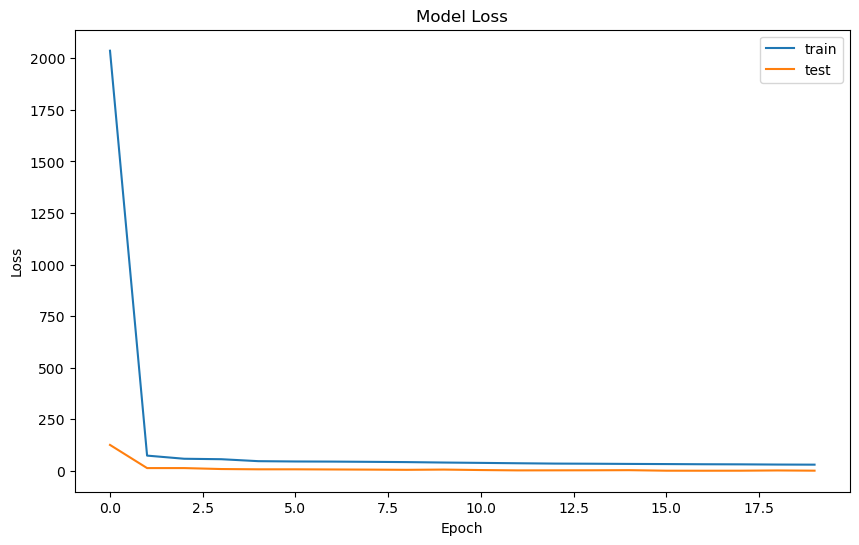

279/279 [==============================] - 0s 934us/step
MSE for route 05F0287S -> 05F0309S: 1.1470241732921242
MAE for route 05F0287S -> 05F0309S: 0.9163429462594445
R2 Score for route 05F0287S -> 05F0309S: 0.916169374234443
MAPE for route 05F0287S -> 05F0309S: 1.0219758102227203%
Accuracy within 10% tolerance for route 05F0287S -> 05F0309S: 100.0%


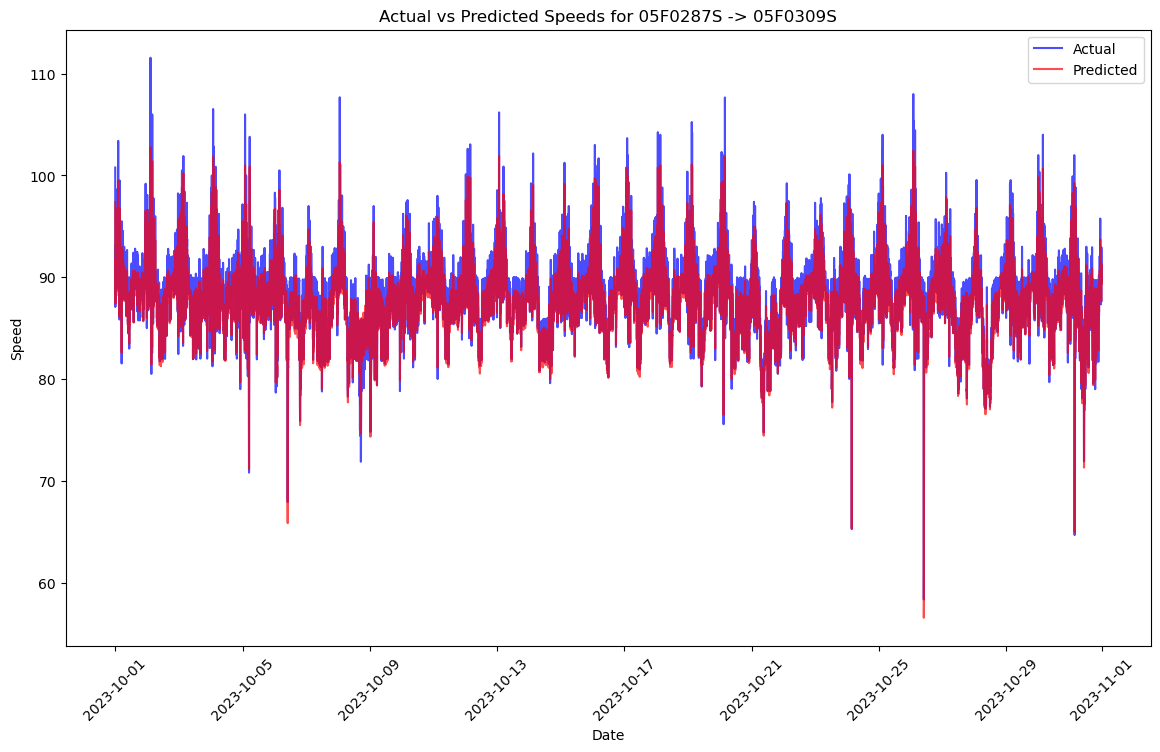

Training model for route: 05F0309N -> 05F0287N
Epoch 1/20
2455/2455 [==============================] - 12s 3ms/step - loss: 1730.8789 - val_loss: 122.4925
Epoch 2/20
2455/2455 [==============================] - 7s 3ms/step - loss: 63.6644 - val_loss: 11.2439
Epoch 3/20
2455/2455 [==============================] - 7s 3ms/step - loss: 42.2858 - val_loss: 8.5751
Epoch 4/20
2455/2455 [==============================] - 7s 3ms/step - loss: 39.8338 - val_loss: 6.1509
Epoch 5/20
2455/2455 [==============================] - 7s 3ms/step - loss: 37.0975 - val_loss: 4.1509
Epoch 6/20
2455/2455 [==============================] - 7s 3ms/step - loss: 35.3880 - val_loss: 4.0605
Epoch 7/20
2455/2455 [==============================] - 7s 3ms/step - loss: 33.5815 - val_loss: 1.6712
Epoch 8/20
2455/2455 [==============================] - 7s 3ms/step - loss: 31.7734 - val_loss: 1.5432
Epoch 9/20
2455/2455 [==============================] - 7s 3ms/step - loss: 31.3125 - val_loss: 3.2976
Epoch 10/20
2455/245

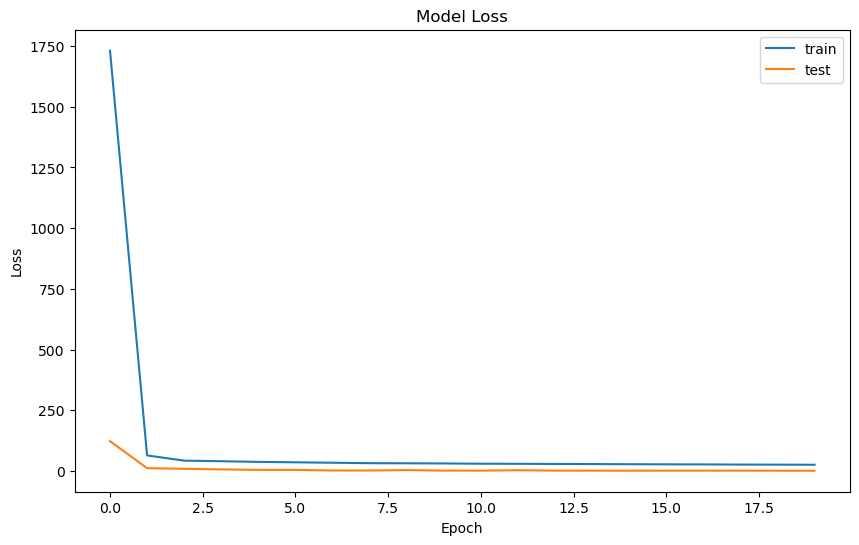

279/279 [==============================] - 0s 930us/step
MSE for route 05F0309N -> 05F0287N: 0.6955609057320925
MAE for route 05F0309N -> 05F0287N: 0.6192265259631766
R2 Score for route 05F0309N -> 05F0287N: 0.9989232878042639
MAPE for route 05F0309N -> 05F0287N: 1.9634717881874684%
Accuracy within 10% tolerance for route 05F0309N -> 05F0287N: 94.67727476467952%


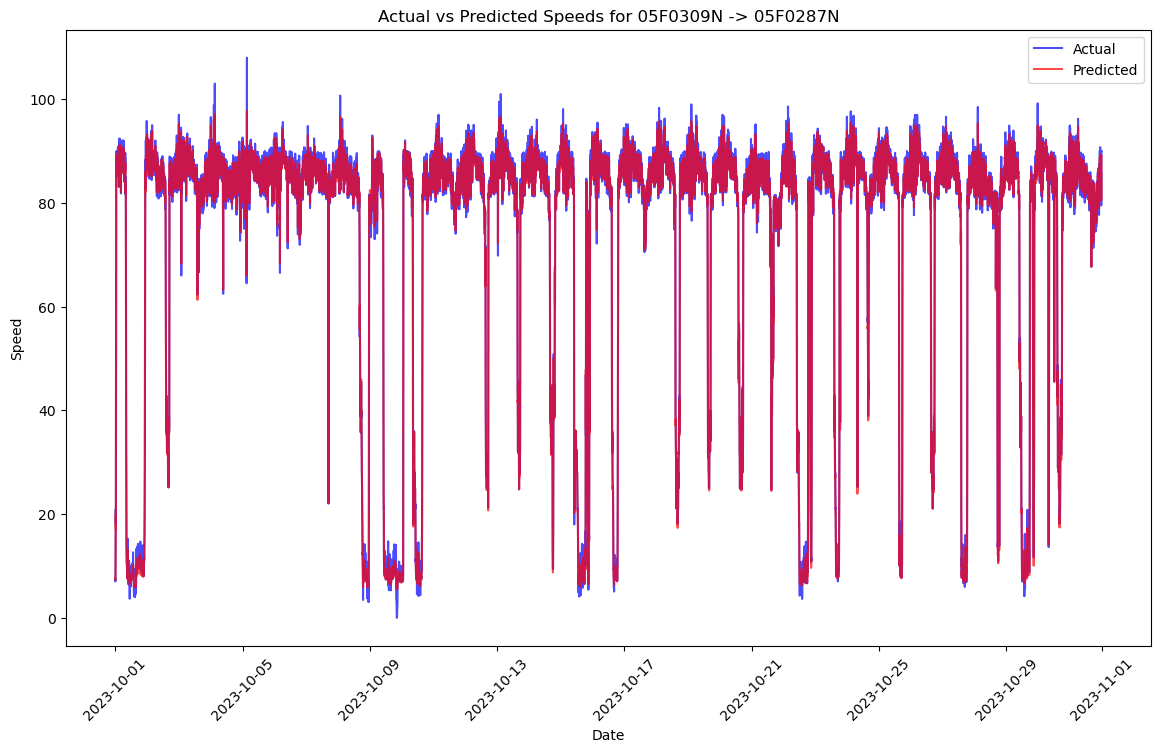

Training model for route: 05F0309S -> 05F0439S
Epoch 1/20
2457/2457 [==============================] - 12s 3ms/step - loss: 2434.3667 - val_loss: 189.0792
Epoch 2/20
2457/2457 [==============================] - 6s 3ms/step - loss: 83.9240 - val_loss: 9.3326
Epoch 3/20
2457/2457 [==============================] - 6s 3ms/step - loss: 55.8088 - val_loss: 9.2642
Epoch 4/20
2457/2457 [==============================] - 6s 3ms/step - loss: 55.7435 - val_loss: 9.2840
Epoch 5/20
2457/2457 [==============================] - 7s 3ms/step - loss: 55.1625 - val_loss: 9.4290
Epoch 6/20
2457/2457 [==============================] - 6s 3ms/step - loss: 52.3099 - val_loss: 8.4088
Epoch 7/20
2457/2457 [==============================] - 6s 3ms/step - loss: 50.2276 - val_loss: 8.3517
Epoch 8/20
2457/2457 [==============================] - 7s 3ms/step - loss: 49.0868 - val_loss: 8.4566
Epoch 9/20
2457/2457 [==============================] - 7s 3ms/step - loss: 47.8407 - val_loss: 7.3775
Epoch 10/20
2457/2457

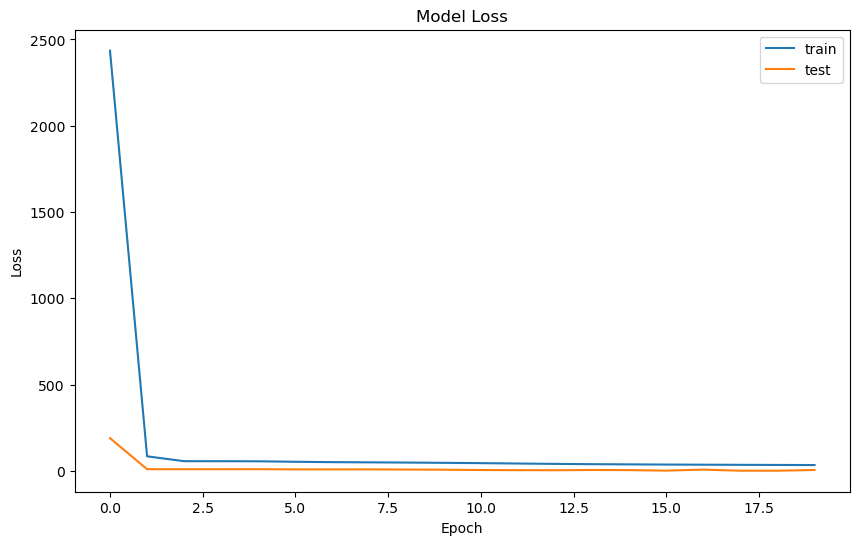

279/279 [==============================] - 0s 923us/step
MSE for route 05F0309S -> 05F0439S: 4.84050483857053
MAE for route 05F0309S -> 05F0439S: 1.9758126464470314
R2 Score for route 05F0309S -> 05F0439S: 0.47747971880270035
MAPE for route 05F0309S -> 05F0439S: 2.0901575981725795%
Accuracy within 10% tolerance for route 05F0309S -> 05F0439S: 99.98879928315412%


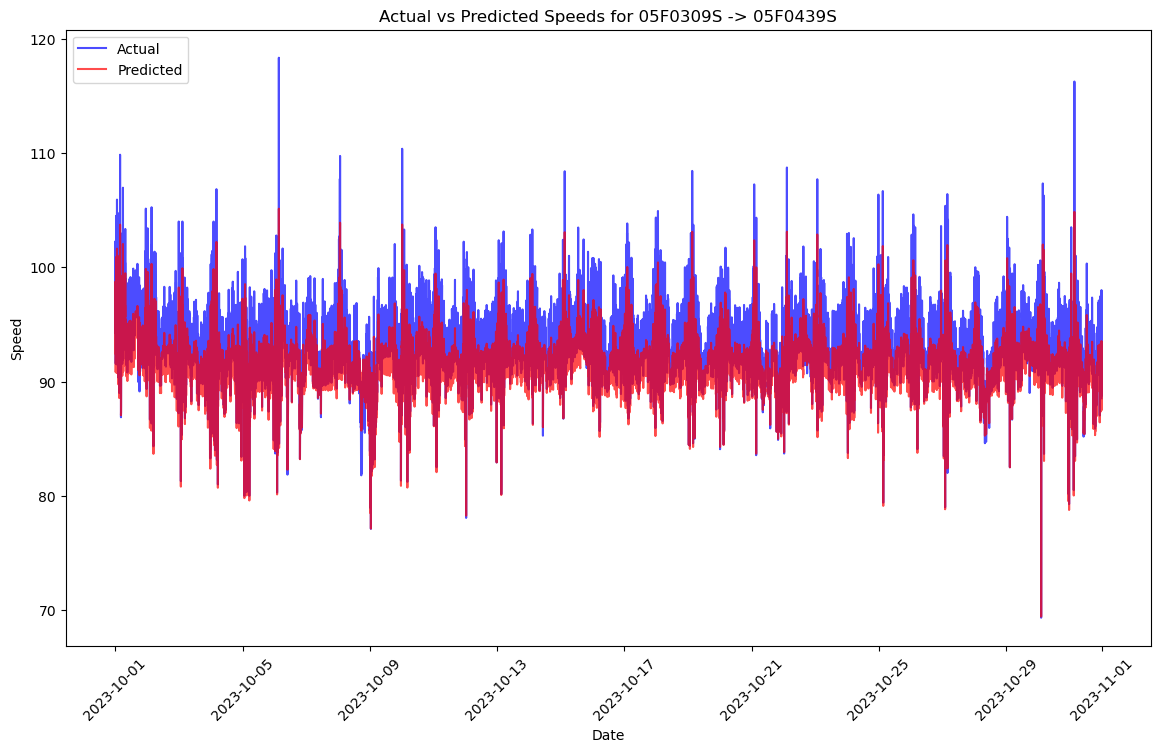

Training model for route: 05F0438N -> 05F0309N
Epoch 1/20
2457/2457 [==============================] - 11s 3ms/step - loss: 2159.6023 - val_loss: 325.4831
Epoch 2/20
2457/2457 [==============================] - 6s 3ms/step - loss: 221.3674 - val_loss: 12.6603
Epoch 3/20
2457/2457 [==============================] - 6s 3ms/step - loss: 50.8740 - val_loss: 9.9751
Epoch 4/20
2457/2457 [==============================] - 6s 3ms/step - loss: 48.2999 - val_loss: 6.8727
Epoch 5/20
2457/2457 [==============================] - 6s 3ms/step - loss: 45.7587 - val_loss: 4.9466
Epoch 6/20
2457/2457 [==============================] - 6s 3ms/step - loss: 44.0929 - val_loss: 11.3036
Epoch 7/20
2457/2457 [==============================] - 6s 3ms/step - loss: 42.1225 - val_loss: 4.6123
Epoch 8/20
2457/2457 [==============================] - 6s 3ms/step - loss: 40.3670 - val_loss: 2.5625
Epoch 9/20
2457/2457 [==============================] - 6s 3ms/step - loss: 38.8154 - val_loss: 4.1354
Epoch 10/20
2457/2

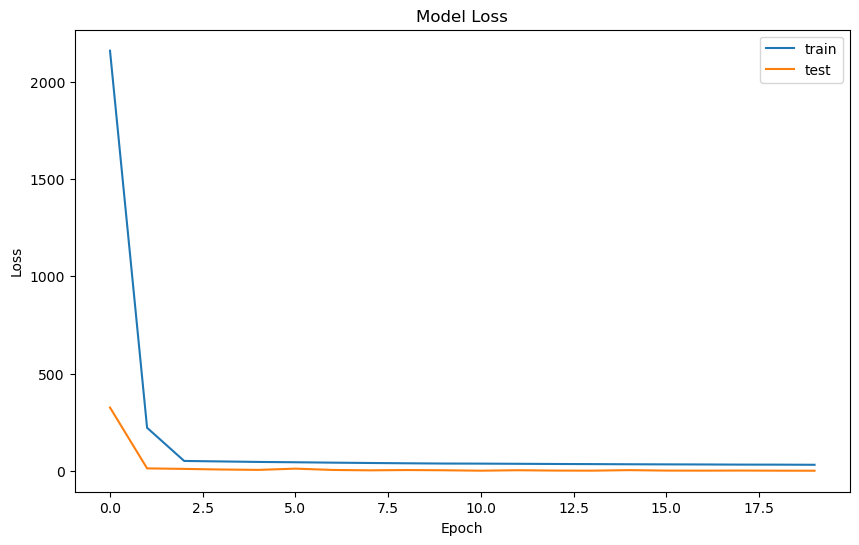

279/279 [==============================] - 0s 967us/step
MSE for route 05F0438N -> 05F0309N: 0.6133678898253591
MAE for route 05F0438N -> 05F0309N: 0.5882814789639313
R2 Score for route 05F0438N -> 05F0309N: 0.9970979523048924
MAPE for route 05F0438N -> 05F0309N: 0.7956569114376002%
Accuracy within 10% tolerance for route 05F0438N -> 05F0309N: 99.85439068100358%


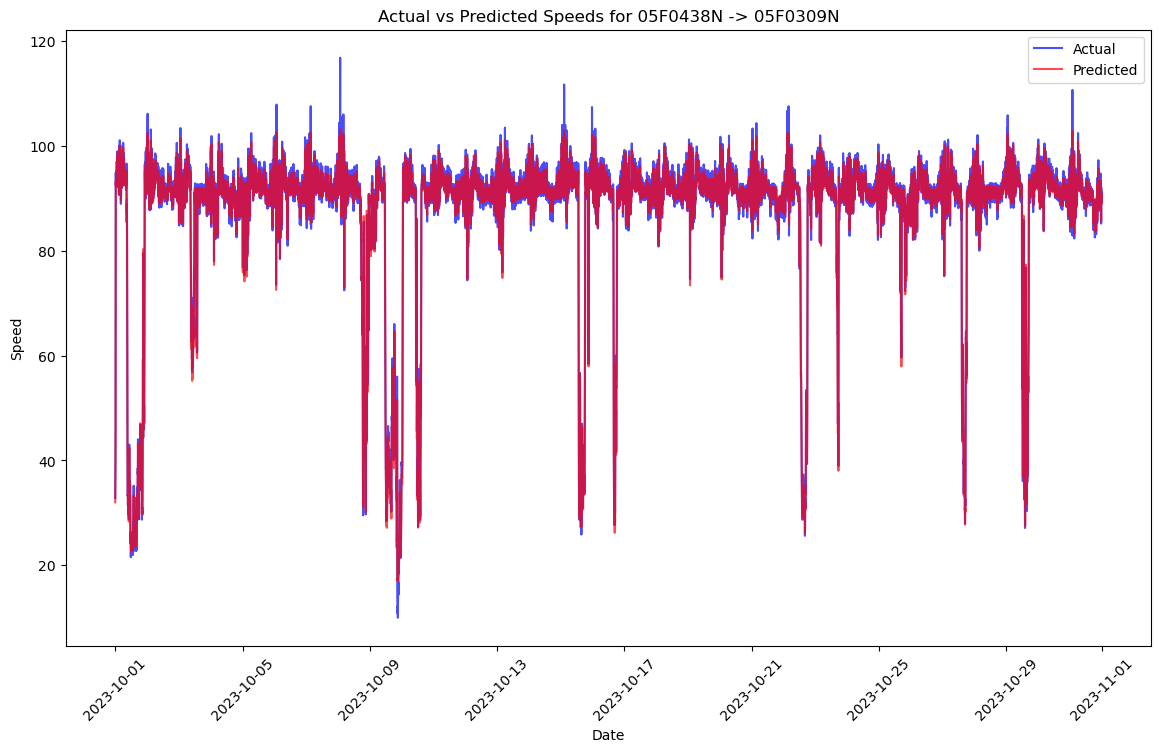

Training model for route: 05F0438N -> 05FR143N
Epoch 1/20
2343/2343 [==============================] - 11s 3ms/step - loss: 3099.1631 - val_loss: 387.0345
Epoch 2/20
2343/2343 [==============================] - 6s 3ms/step - loss: 150.8149 - val_loss: 37.1805
Epoch 3/20
2343/2343 [==============================] - 6s 3ms/step - loss: 80.2102 - val_loss: 37.3240
Epoch 4/20
2343/2343 [==============================] - 6s 3ms/step - loss: 80.1979 - val_loss: 37.4858
Epoch 5/20
2343/2343 [==============================] - 6s 3ms/step - loss: 79.6851 - val_loss: 37.3824
Epoch 6/20
2343/2343 [==============================] - 6s 3ms/step - loss: 78.8720 - val_loss: 37.1224
Epoch 7/20
2343/2343 [==============================] - 6s 3ms/step - loss: 77.5898 - val_loss: 23.9968
Epoch 8/20
2343/2343 [==============================] - 6s 3ms/step - loss: 62.6626 - val_loss: 11.5312
Epoch 9/20
2343/2343 [==============================] - 6s 3ms/step - loss: 54.0934 - val_loss: 5.4843
Epoch 10/20
2

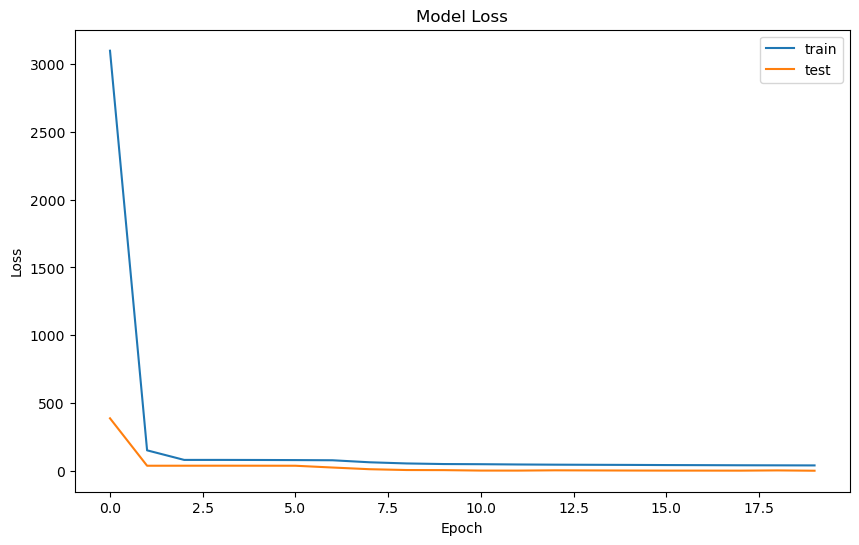

268/268 [==============================] - 0s 982us/step
MSE for route 05F0438N -> 05FR143N: 0.40942770061938166
MAE for route 05F0438N -> 05FR143N: 0.4845481498614452
R2 Score for route 05F0438N -> 05FR143N: 0.9888981391365712
MAPE for route 05F0438N -> 05FR143N: 0.49398573681896346%
Accuracy within 10% tolerance for route 05F0438N -> 05FR143N: 100.0%


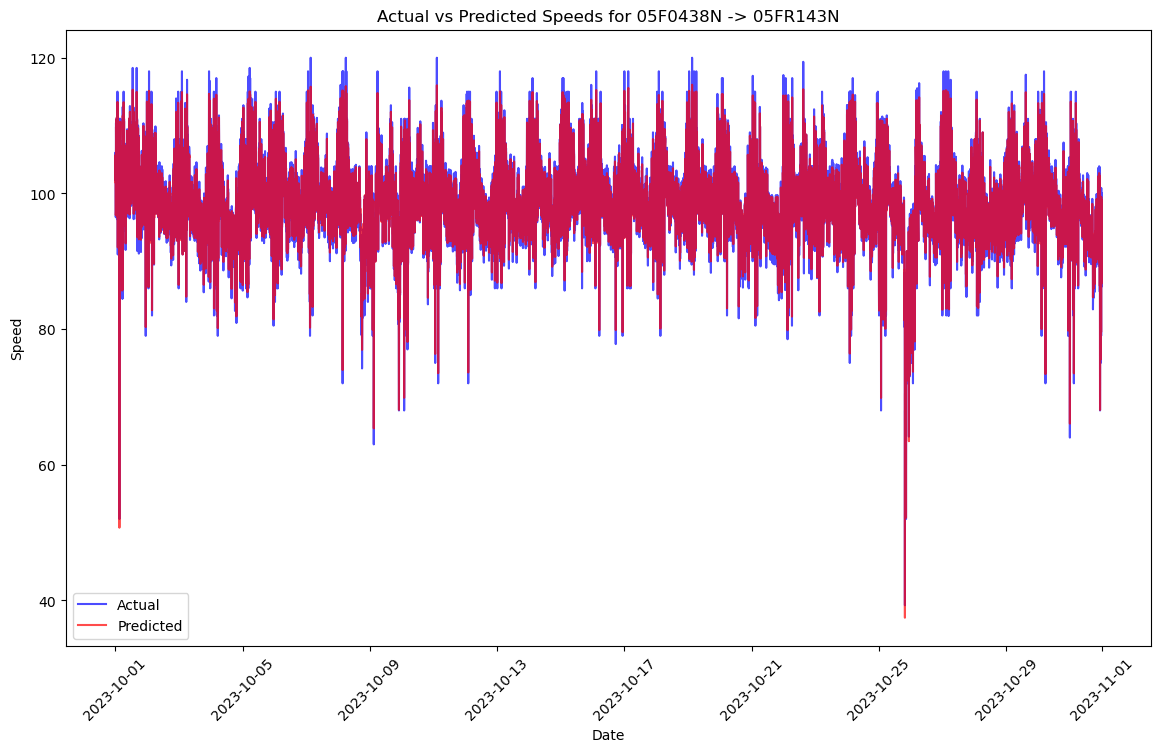

Training model for route: 05F0439S -> 05F0494S
Epoch 1/20
2454/2454 [==============================] - 12s 3ms/step - loss: 2463.6108 - val_loss: 200.7754
Epoch 2/20
2454/2454 [==============================] - 7s 3ms/step - loss: 89.7607 - val_loss: 17.0474
Epoch 3/20
2454/2454 [==============================] - 7s 3ms/step - loss: 60.1202 - val_loss: 17.0157
Epoch 4/20
2454/2454 [==============================] - 7s 3ms/step - loss: 60.1719 - val_loss: 17.1188
Epoch 5/20
2454/2454 [==============================] - 7s 3ms/step - loss: 59.1849 - val_loss: 17.2335
Epoch 6/20
2454/2454 [==============================] - 6s 3ms/step - loss: 58.4554 - val_loss: 16.6557
Epoch 7/20
2454/2454 [==============================] - 7s 3ms/step - loss: 56.5086 - val_loss: 11.3689
Epoch 8/20
2454/2454 [==============================] - 7s 3ms/step - loss: 50.3140 - val_loss: 5.1336
Epoch 9/20
2454/2454 [==============================] - 6s 3ms/step - loss: 44.2122 - val_loss: 2.3289
Epoch 10/20
245

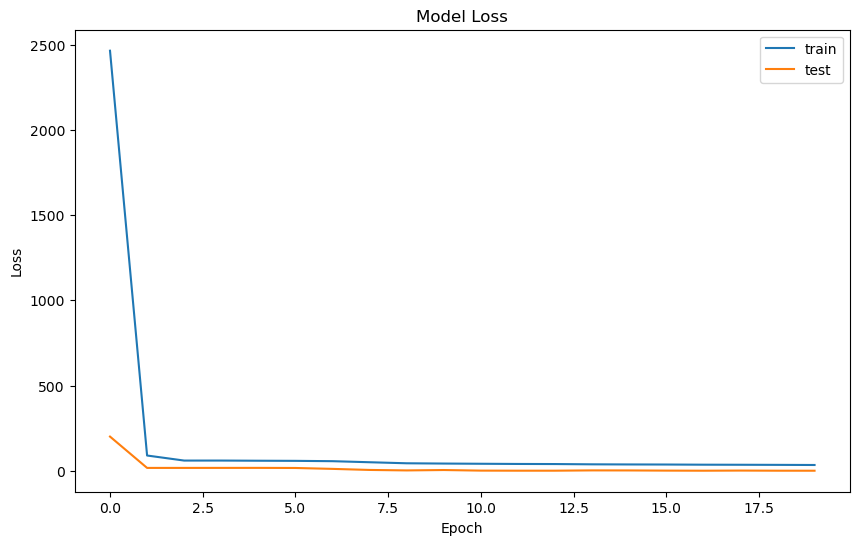

279/279 [==============================] - 0s 887us/step
MSE for route 05F0439S -> 05F0494S: 0.5697672227078646
MAE for route 05F0439S -> 05F0494S: 0.5468166123966055
R2 Score for route 05F0439S -> 05F0494S: 0.9664112032434742
MAPE for route 05F0439S -> 05F0494S: 0.5851337606311723%
Accuracy within 10% tolerance for route 05F0439S -> 05F0494S: 100.0%


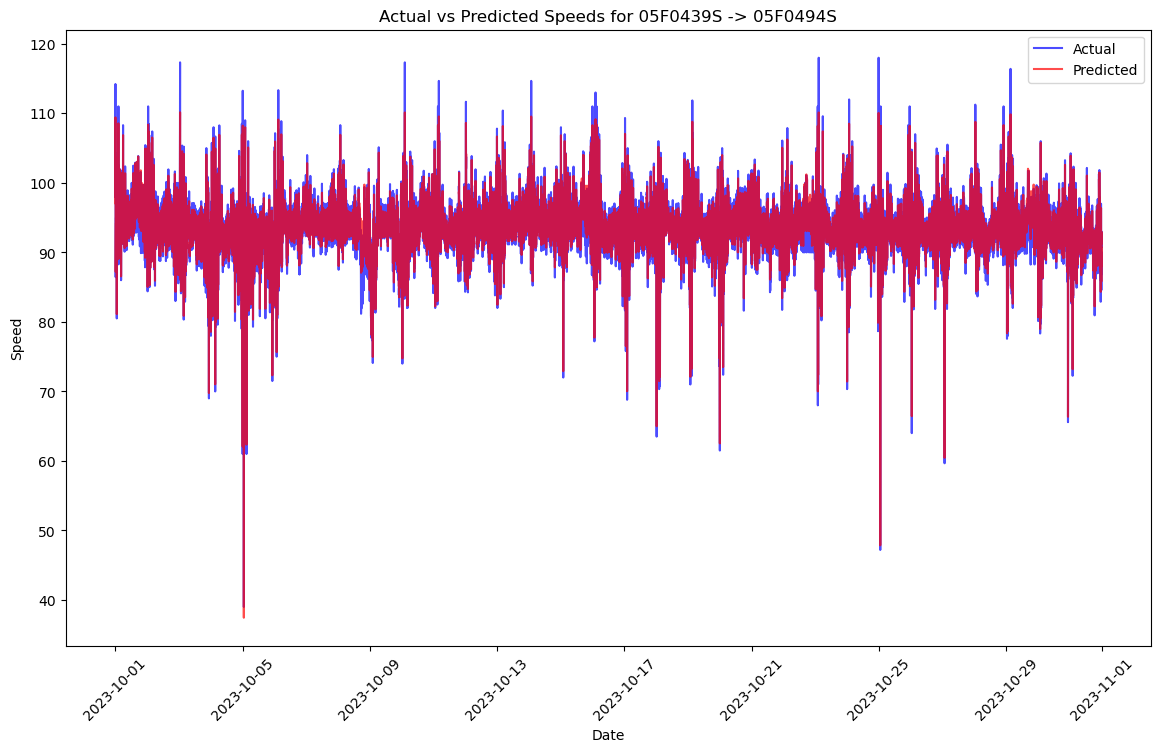

Training model for route: 05F0528N -> 05F0438N
Epoch 1/20
2451/2451 [==============================] - 11s 3ms/step - loss: 2387.7097 - val_loss: 185.9125
Epoch 2/20
2451/2451 [==============================] - 6s 3ms/step - loss: 92.0923 - val_loss: 21.2225
Epoch 3/20
2451/2451 [==============================] - 6s 3ms/step - loss: 65.1314 - val_loss: 21.5669
Epoch 4/20
2451/2451 [==============================] - 6s 3ms/step - loss: 64.5734 - val_loss: 21.1112
Epoch 5/20
2451/2451 [==============================] - 6s 3ms/step - loss: 63.6827 - val_loss: 21.0106
Epoch 6/20
2451/2451 [==============================] - 6s 3ms/step - loss: 53.7334 - val_loss: 8.6650
Epoch 7/20
2451/2451 [==============================] - 6s 3ms/step - loss: 47.1999 - val_loss: 3.0199
Epoch 8/20
2451/2451 [==============================] - 6s 3ms/step - loss: 43.8157 - val_loss: 1.9271
Epoch 9/20
2451/2451 [==============================] - 6s 3ms/step - loss: 41.9274 - val_loss: 1.2645
Epoch 10/20
2451/

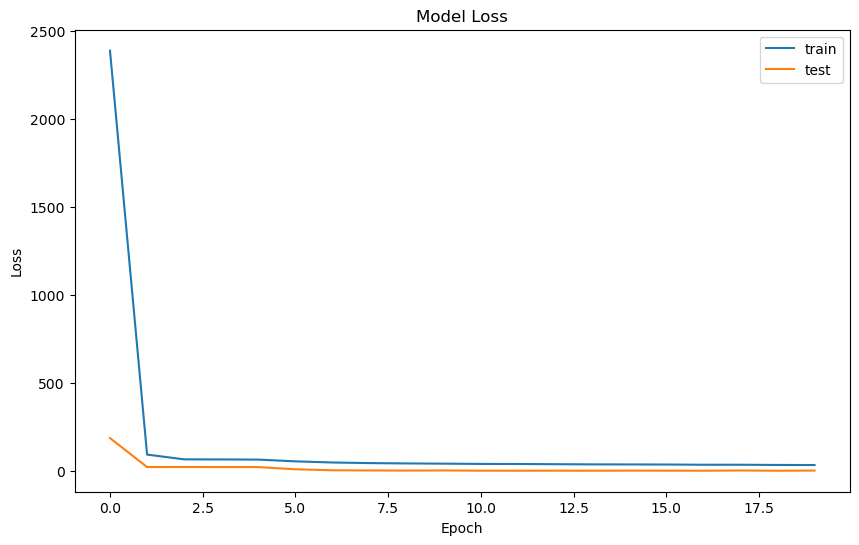

279/279 [==============================] - 0s 900us/step
MSE for route 05F0528N -> 05F0438N: 1.3702876595247613
MAE for route 05F0528N -> 05F0438N: 1.0136476857585202
R2 Score for route 05F0528N -> 05F0438N: 0.9349122921393755
MAPE for route 05F0528N -> 05F0438N: 1.1244353730011987%
Accuracy within 10% tolerance for route 05F0528N -> 05F0438N: 100.0%


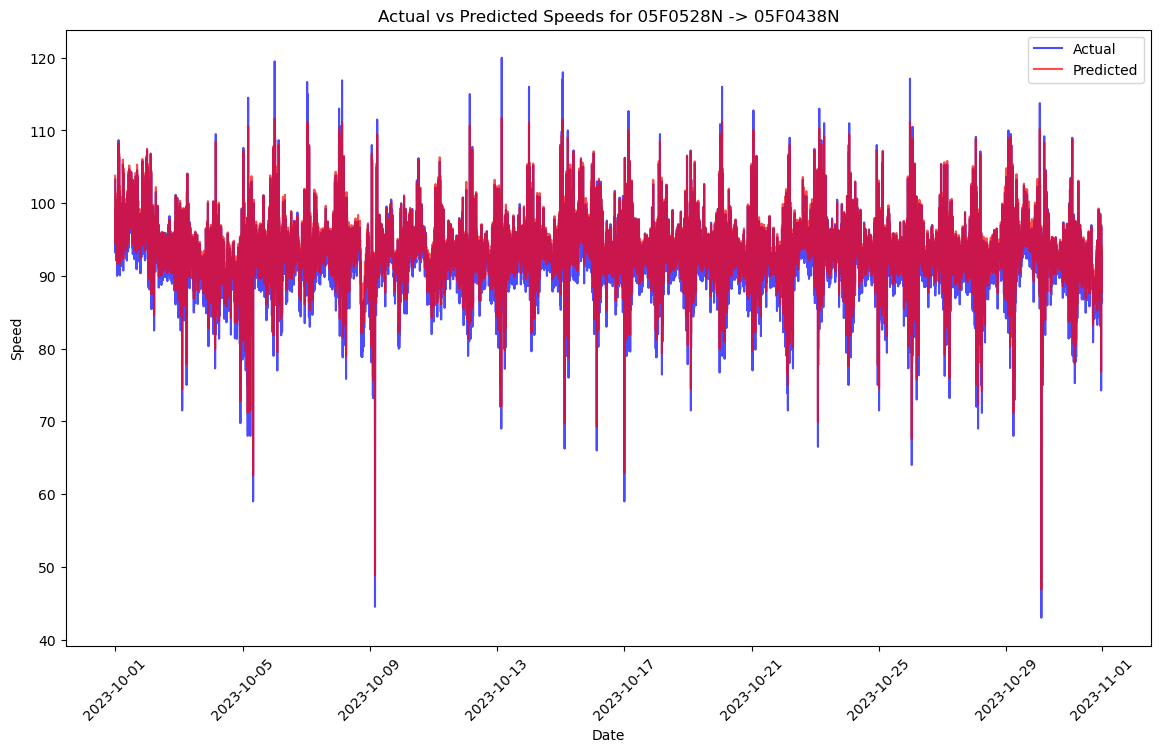

Training model for route: 05FR113S -> 05F0439S
Epoch 1/20
2385/2385 [==============================] - 11s 3ms/step - loss: 3071.7612 - val_loss: 372.4703
Epoch 2/20
2385/2385 [==============================] - 6s 2ms/step - loss: 143.6733 - val_loss: 33.7193
Epoch 3/20
2385/2385 [==============================] - 6s 3ms/step - loss: 80.7392 - val_loss: 33.8897
Epoch 4/20
2385/2385 [==============================] - 6s 2ms/step - loss: 80.1779 - val_loss: 34.2246
Epoch 5/20
2385/2385 [==============================] - 6s 3ms/step - loss: 79.5804 - val_loss: 33.8337
Epoch 6/20
2385/2385 [==============================] - 6s 3ms/step - loss: 79.0673 - val_loss: 33.8885
Epoch 7/20
2385/2385 [==============================] - 6s 3ms/step - loss: 74.8654 - val_loss: 24.8850
Epoch 8/20
2385/2385 [==============================] - 6s 3ms/step - loss: 64.3867 - val_loss: 5.7940
Epoch 9/20
2385/2385 [==============================] - 6s 3ms/step - loss: 53.1992 - val_loss: 3.9227
Epoch 10/20
23

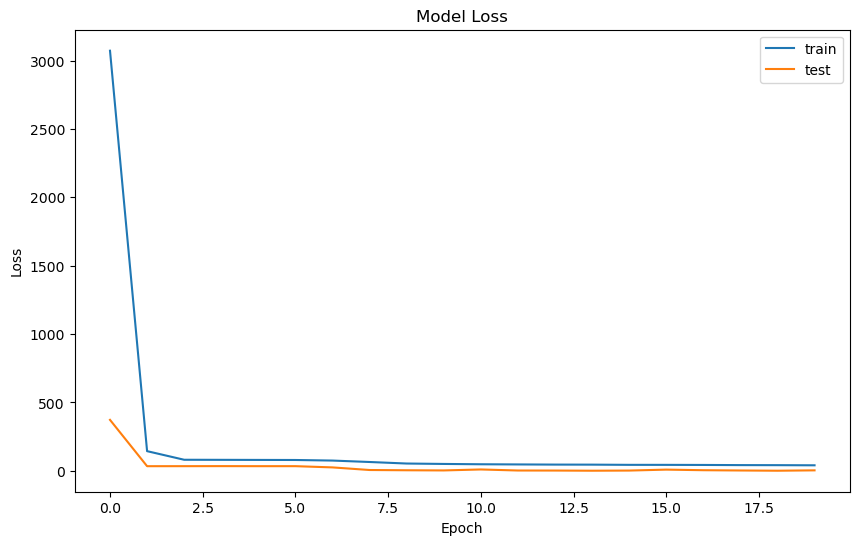

272/272 [==============================] - 0s 881us/step
MSE for route 05FR113S -> 05F0439S: 3.314153844499403
MAE for route 05FR113S -> 05F0439S: 1.7686841704439127
R2 Score for route 05FR113S -> 05F0439S: 0.9015059352141908
MAPE for route 05FR113S -> 05F0439S: 1.7872271042986208%
Accuracy within 10% tolerance for route 05FR113S -> 05F0439S: 100.0%


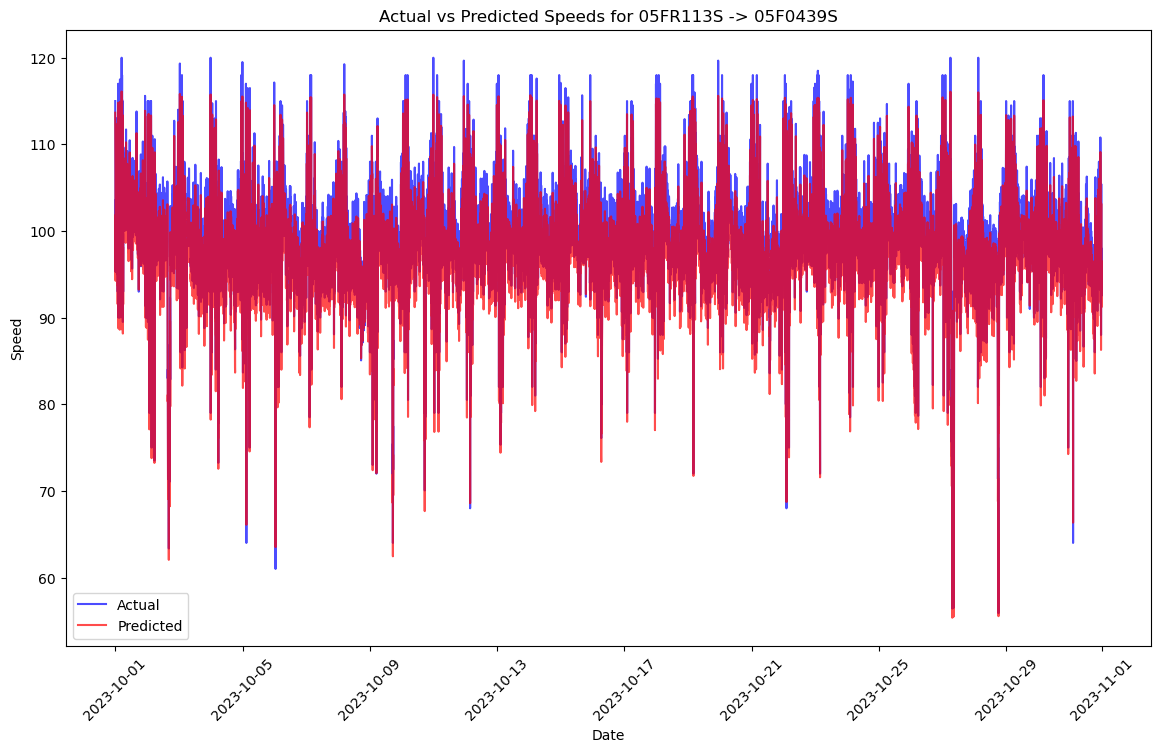

                   route       mse       mae        r2    accuracy
0   03F0158S -> 05F0000S  0.077400  0.197680  0.998342   99.742355
1   03F0201N -> 05F0000S  0.638273  0.610059  0.996449   99.114648
2   05F0000S -> 05F0055S  0.680916  0.617630  0.991622   99.865591
3   05F0001N -> 03F0150N  1.066225  0.495213  0.986670   99.517937
4   05F0001N -> 03F0201S  0.382001  0.471341  0.995889   99.686239
5   05F0055N -> 05F0001N  1.686315  1.162666  0.982481   99.484709
6   05F0055S -> 05F0287S  0.590908  0.587245  0.993619   99.876751
7   05F0287N -> 05F0055N  0.582064  0.574445  0.996900   99.753584
8   05F0287S -> 05F0309S  1.147024  0.916343  0.916169  100.000000
9   05F0309N -> 05F0287N  0.695561  0.619227  0.998923   94.677275
10  05F0309S -> 05F0439S  4.840505  1.975813  0.477480   99.988799
11  05F0438N -> 05F0309N  0.613368  0.588281  0.997098   99.854391
12  05F0438N -> 05FR143N  0.409428  0.484548  0.988898  100.000000
13  05F0439S -> 05F0494S  0.569767  0.546817  0.966411  100.00

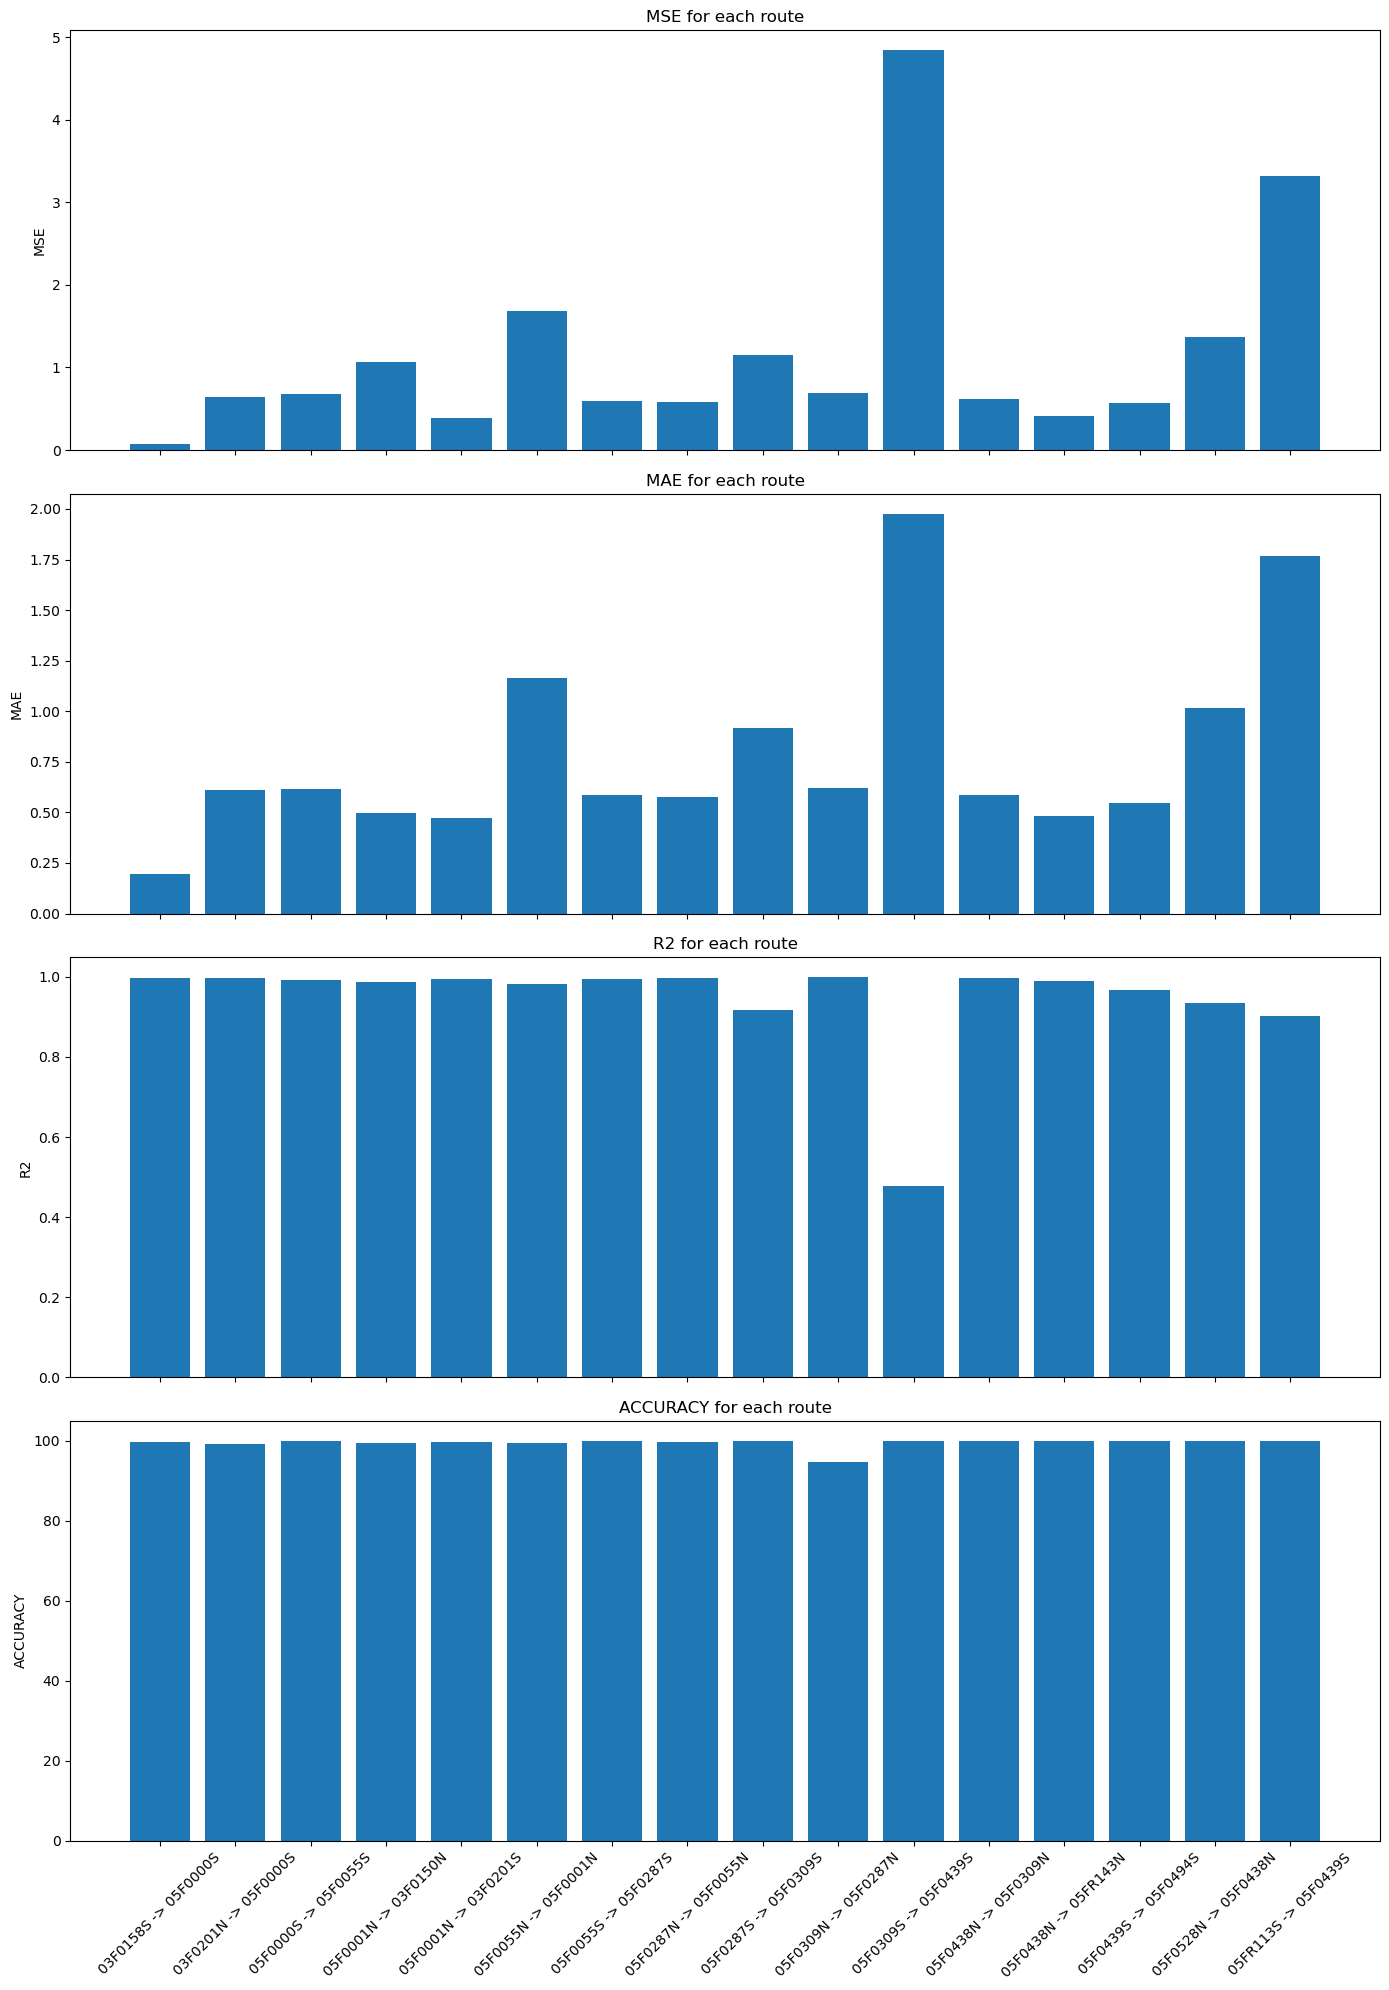

In [4]:
results = []
for (start_point, end_point), group in grouped:
    print(f"Training model for route: {start_point} -> {end_point}")
    
     # 独热编码
    #group_encoded = pd.get_dummies(group, columns=['起點路段', '終點路段'])
    
    group = group.drop(columns=['起點路段','終點路段'])
    group = create_features(group)
    # Split the data into training and testing sets
    train_data = group[group['時間'].dt.month <= 9]
    test_data = group[group['時間'].dt.month == 10]

    if len(train_data) == 0 or len(test_data) == 0:
        print(f"Skipping route {start_point} -> {end_point} due to insufficient data")
        continue

    X_train_base = train_data.drop(columns=['平均速度', '時間'])
    y_train = train_data['平均速度']

    X_test_base = test_data.drop(columns=['平均速度', '時間'])
    y_test = test_data['平均速度']

    # Normalize the feature columns
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_base)
    X_test_scaled = scaler.transform(X_test_base)

    #print(X_test_scaled,X_test_base)

    # Reshape the data for LSTM input
    X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test))

    # Make predictions
    y_pred_train = model.predict(X_train_reshaped)
    y_pred_test = model.predict(X_test_reshaped)

    # Plot loss and val_loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Calculate R^2
    y_pred = model.predict(X_test_reshaped).flatten()
    y_test = y_test.values.flatten()
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Filter out zero values for MAPE and accuracy calculation
    non_zero_idx = y_test != 0
    y_test_non_zero = y_test[non_zero_idx]
    y_pred_non_zero = y_pred[non_zero_idx]
    
    mape = np.mean(np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero)) * 100
    tolerance = 0.10  # 10% tolerance
    accuracy = np.mean(np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero) < tolerance) * 100

    print(f"MSE for route {start_point} -> {end_point}: {mse}")
    print(f"MAE for route {start_point} -> {end_point}: {mae}")
    print(f"R2 Score for route {start_point} -> {end_point}: {r2}")
    print(f"MAPE for route {start_point} -> {end_point}: {mape}%")
    print(f"Accuracy within 10% tolerance for route {start_point} -> {end_point}: {accuracy}%")
    results.append((f"{start_point} -> {end_point}", mse, mae, r2, accuracy))

    # Plot actual vs predicted speeds
    plt.figure(figsize=(14, 8))
    plt.plot(test_data['時間'], y_test, label='Actual', color='blue', alpha=0.7)
    plt.plot(test_data['時間'], y_pred_test, label='Predicted', color='red', alpha=0.7)
    plt.xlabel('Date')
    plt.ylabel('Speed')
    plt.title(f'Actual vs Predicted Speeds for {start_point} -> {end_point}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    tf.keras.backend.clear_session()
    del model
    gc.collect()

# Convert results to DataFrame and display
results_df = pd.DataFrame(results, columns=['route', 'mse', 'mae', 'r2', 'accuracy'])
print(results_df)

# Plot the metrics as a combined bar chart
metrics = ['mse', 'mae', 'r2', 'accuracy']
results_df.set_index('route', inplace=True)

# Create subplots
fig, ax = plt.subplots(len(metrics), 1, figsize=(14, 20), sharex=True)

for i, metric in enumerate(metrics):
    ax[i].bar(results_df.index, results_df[metric])
    ax[i].set_title(f'{metric.upper()} for each route')
    ax[i].set_ylabel(metric.upper())
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

                   route       mse       mae        r2    accuracy
0   03F0158S -> 05F0000S  0.077400  0.197680  0.998342   99.742355
1   03F0201N -> 05F0000S  0.638273  0.610059  0.996449   99.114648
2   05F0000S -> 05F0055S  0.680916  0.617630  0.991622   99.865591
3   05F0001N -> 03F0150N  1.066225  0.495213  0.986670   99.517937
4   05F0001N -> 03F0201S  0.382001  0.471341  0.995889   99.686239
5   05F0055N -> 05F0001N  1.686315  1.162666  0.982481   99.484709
6   05F0055S -> 05F0287S  0.590908  0.587245  0.993619   99.876751
7   05F0287N -> 05F0055N  0.582064  0.574445  0.996900   99.753584
8   05F0287S -> 05F0309S  1.147024  0.916343  0.916169  100.000000
9   05F0309N -> 05F0287N  0.695561  0.619227  0.998923   94.677275
10  05F0309S -> 05F0439S  4.840505  1.975813  0.477480   99.988799
11  05F0438N -> 05F0309N  0.613368  0.588281  0.997098   99.854391
12  05F0438N -> 05FR143N  0.409428  0.484548  0.988898  100.000000
13  05F0439S -> 05F0494S  0.569767  0.546817  0.966411  100.00

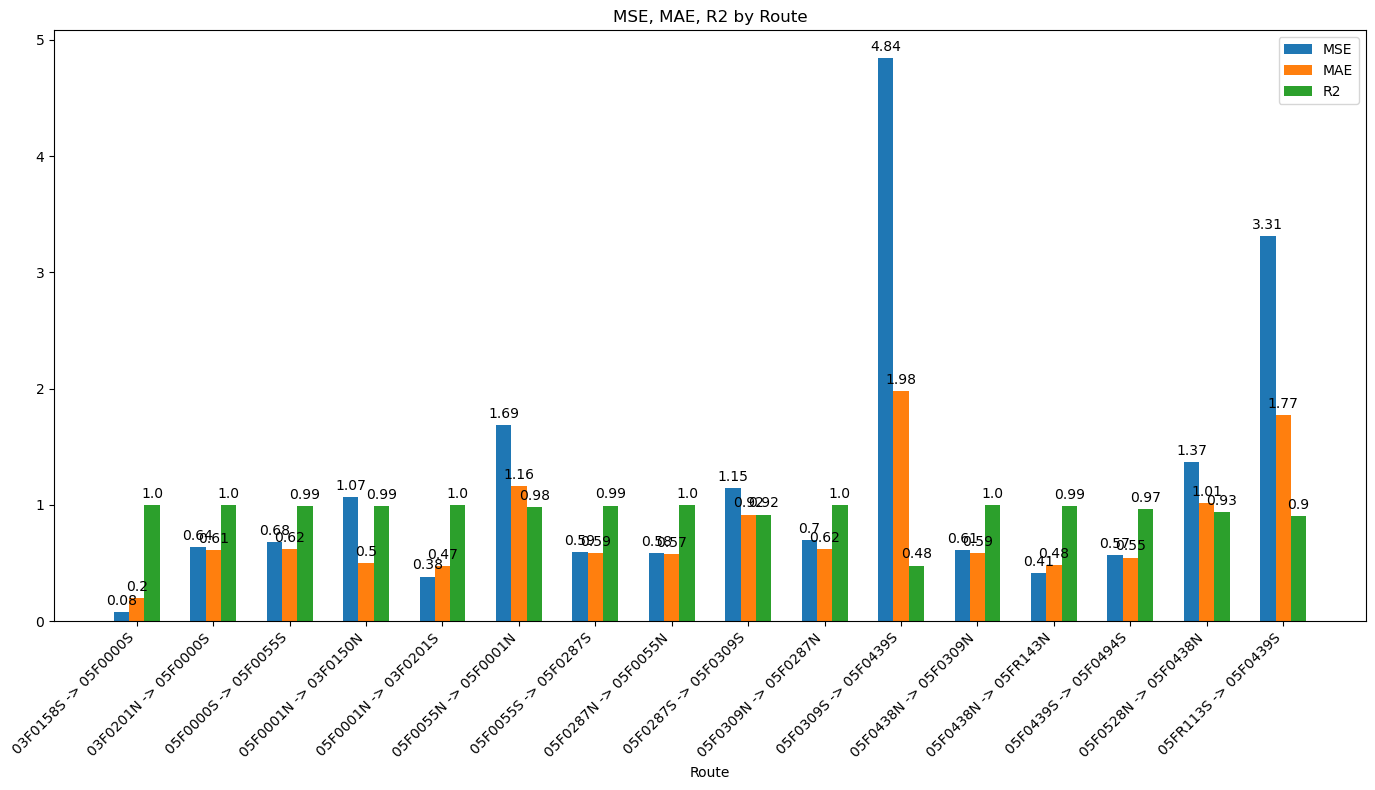

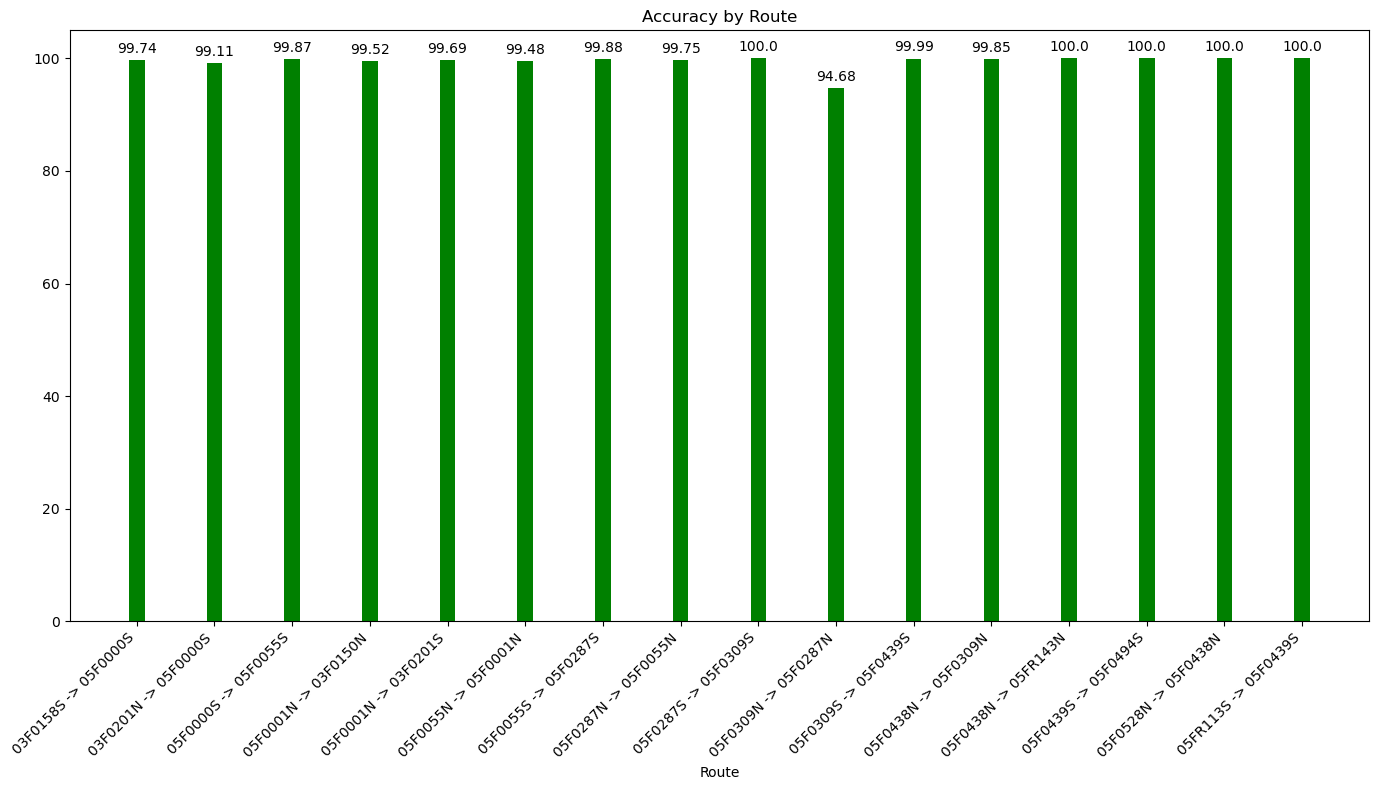

In [5]:
results_df = pd.DataFrame(results, columns=['route', 'mse', 'mae', 'r2', 'accuracy'])
print(results_df)

# Plot MSE, MAE, R2 as a combined bar chart
fig, ax = plt.subplots(figsize=(14, 8))

width = 0.2  # the width of the bars
x = np.arange(len(results_df))

# Plot each metric with different colors
rects1 = ax.bar(x - width, results_df['mse'], width, label='MSE')
rects2 = ax.bar(x, results_df['mae'], width, label='MAE')
rects3 = ax.bar(x + width, results_df['r2'], width, label='R2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Route')
ax.set_title('MSE, MAE, R2 by Route')
ax.set_xticks(x)
ax.set_xticklabels(results_df['route'], rotation=45, ha='right')
ax.legend()

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

# Plot accuracy in a separate bar chart
fig, ax = plt.subplots(figsize=(14, 8))
rects4 = ax.bar(results_df.index, results_df['accuracy'], width, label='Accuracy', color='green')

ax.set_xlabel('Route')
ax.set_title('Accuracy by Route')
ax.set_xticks(x)
ax.set_xticklabels(results_df['route'], rotation=45, ha='right')

autolabel(rects4)

fig.tight_layout()
plt.show()